## import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load 'train' Dataset

In [2]:
train = pd.read_csv("train.csv", parse_dates = ["Dates"])

print(train.shape)
train.head()

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [3]:
train.Dates.describe()

count                  878049
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

## Load 'test' Dataset

In [4]:
test = pd.read_csv("test.csv", parse_dates = ["Dates"], index_col = "Id")

print(test.shape)
test.head()

(884262, 6)


,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [5]:
test.Dates.describe()

count                  884262
unique                 392173
top       2010-01-01 00:01:00
freq                      150
first     2003-01-01 00:01:00
last      2015-05-10 23:59:00
Name: Dates, dtype: object

## Prerpocessing

### 0. 분석 대상 컬럼

In [6]:
train.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

* **Dates** - features로의 사용 효용성을 분석하겠습니다.
* **Category** - label column이므로, 분석하지 않습니다.
* Descript - train.csv 에만 존재하는 범죄 세부 데이터로 분석은 하지 않겠습니다.(후순위, 참고사항)
* **DayOfWeek** - features로의 사용 효용성을 분석하겠습니다.
* **PdDistrict** - features로의 사용 효용성을 분석하겠습니다.
* Resolution -  train.csv 에만 존재하는 데이터이며, 범죄의 해결상태로, category를 예측하는데 큰 도움은 되지 않을 것 같습니다. 일단은 분석하지 않겠습니다.(후순위, 참고사항)
* **Address** - features로의 사용 효용성을 분석하겠습니다.
* **X** - features로의 사용 효용성을 분석하겠습니다.
* **Y** - features로의 사용 효용성을 분석하겠습니다.

In [307]:
test.columns

Index(['Dates', 'DayOfWeek', 'PdDistrict', 'Address', 'X', 'Y'], dtype='object')

### 1. 중복값 제거

In [6]:
train.duplicated().sum()

2323

In [7]:
train.drop_duplicates(inplace = True)
train.Dates.describe()

count                  875726
unique                 389257
top       2011-01-01 00:01:00
freq                      185
first     2003-01-06 00:01:00
last      2015-05-13 23:53:00
Name: Dates, dtype: object

### 2. outlier 확인

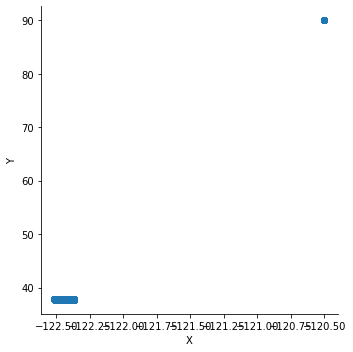

In [8]:
sns.lmplot(data = train, x = 'X', y = 'Y', fit_reg = False)

In [9]:
X_outlier = (train["X"] == train["X"].max())
Y_outlier = (train['Y'] == train['Y'].max())

outlier = train[X_outlier & Y_outlier]

print(outlier.shape)
outlier

(67, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0
...,...,...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0
857248,2003-04-14 16:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,GILMAN AV / FITCH ST,-120.5,90.0


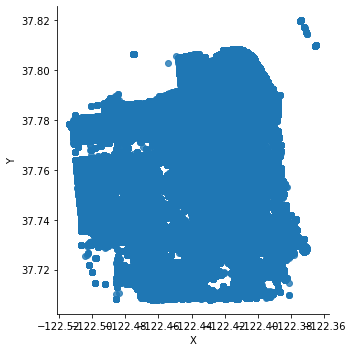

In [10]:
non_outlier = train[~(X_outlier & Y_outlier)]

sns.lmplot(data = non_outlier, x = 'X', y = 'Y', fit_reg = False)

In [11]:
# train.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)
# test.replace({'X': -120.5, 'Y': 90.0}, np.NaN, inplace=True)

In [12]:
# imputer = SimpleImputer(strategy='mean')

In [13]:
# for district in train['PdDistrict'].unique():
#     train.loc[train['PdDistrict']==district, ['X', 'Y']] = imputer.fit_transform(
#         train.loc[train['PdDistrict']==district, ['X', 'Y']])
#     # fit은 train 데이터로 해주었기때문에 transform만 적용
#     test.loc[test['PdDistrict']==district, ['X', 'Y']] = imputer.transform(
#         test.loc[test['PdDistrict']==district, ['X', 'Y']])    
    
# train_gdf = create_gdf(train)

### 3. Dates

In [14]:
train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second
train["Dates-week"] = train["Dates"].dt.dayofweek

In [15]:
train[["Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second", "Dates-week"]].head()

,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-week
0,2015,5,13,23,53,0,2
1,2015,5,13,23,53,0,2
2,2015,5,13,23,33,0,2
3,2015,5,13,23,30,0,2
4,2015,5,13,23,30,0,2


In [16]:
test["Dates-year"] = train["Dates"].dt.year
test["Dates-month"] = train["Dates"].dt.month
test["Dates-day"] = train["Dates"].dt.day
test["Dates-hour"] = train["Dates"].dt.hour
test["Dates-minute"] = train["Dates"].dt.minute
test["Dates-second"] = train["Dates"].dt.second
test["Dates-week"] = train["Dates"].dt.dayofweek

In [17]:
test[["Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second", "Dates-week"]].head()

,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-week
Id,,,,,,,
0,2015.0,5.0,13.0,23.0,53.0,0.0,2.0
1,2015.0,5.0,13.0,23.0,53.0,0.0,2.0
2,2015.0,5.0,13.0,23.0,33.0,0.0,2.0
3,2015.0,5.0,13.0,23.0,30.0,0.0,2.0
4,2015.0,5.0,13.0,23.0,30.0,0.0,2.0


#### - Dates column 시각화 분석

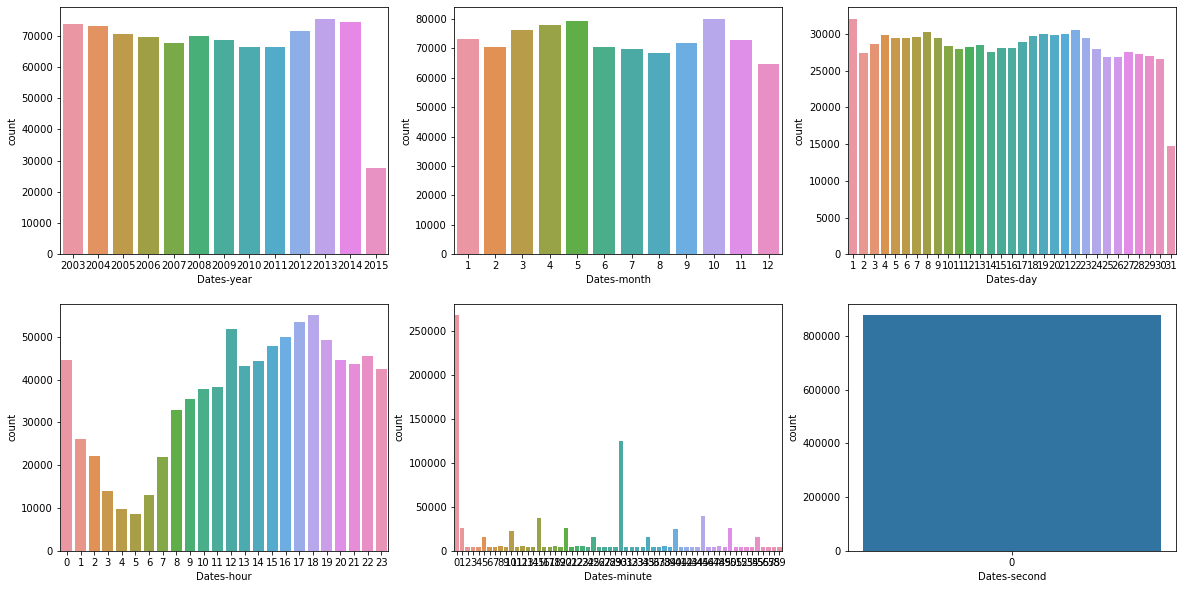

In [20]:
%matplotlib inline
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)

figure.set_size_inches(20,10)

sns.countplot(data = train, x = "Dates-year", ax = ax1)
sns.countplot(data = train, x = "Dates-month", ax = ax2)
sns.countplot(data = train, x = "Dates-day", ax = ax3)
sns.countplot(data = train, x = "Dates-hour", ax = ax4)
sns.countplot(data = train, x = "Dates-minute", ax = ax5)
sns.countplot(data = train, x = "Dates-second", ax = ax6)

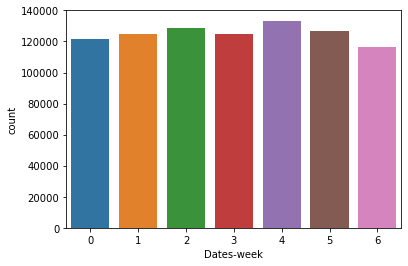

In [21]:
sns.countplot(data = train, x = 'Dates-week')

- Dates column은 분석 결과,  feature로 사용할 수 있을것으로 보이며, 이후 modeling 작업에 해당 feature로 사용하기 위해 encoding 작업을 진행합니다.
- Dates column을 one-hot encoding 합니다.

In [82]:
train["DayOfWeek"].value_counts()

Friday       133734
Wednesday    129211
Saturday     126810
Thursday     125038
Tuesday      124965
Monday       121584
Sunday       116707
Name: DayOfWeek, dtype: int64

In [317]:
train["DayOfWeek"].value_counts().index

Index(['Friday', 'Wednesday', 'Saturday', 'Thursday', 'Tuesday', 'Monday',
       'Sunday'],
      dtype='object')

In [18]:
week_list = ["Monday", "Thusdaty", "Wednsday", "Thursday", "Friday", "Saturday", "Sunday"]

for i in week_list : 
    cols = "Dates-" + i
    train[cols] = train["Dates-week"] == i
    test[cols] = test["Dates-week"] == i
train[["Dates-Monday", "Dates-Thusdaty", "Dates-Wednsday", "Dates-Thursday", "Dates-Friday", "Dates-Saturday", "Dates-Sunday"]].head(100)

//anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Dates-Monday,Dates-Thusdaty,Dates-Wednsday,Dates-Thursday,Dates-Friday,Dates-Saturday,Dates-Sunday
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False


In [19]:
test[["Dates-Monday", "Dates-Thusdaty", "Dates-Wednsday", "Dates-Thursday", "Dates-Friday", "Dates-Saturday", "Dates-Sunday"]].head()

,Dates-Monday,Dates-Thusdaty,Dates-Wednsday,Dates-Thursday,Dates-Friday,Dates-Saturday,Dates-Sunday
Id,,,,,,,
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


In [20]:
# dayofweek_train_onehot = pd.get_dummies(train["DayOfWeek"], prefix = 'DayOfWeek')

# train = pd.concat([train, dayofweek_train_onehot], axis = 1)

# print(train.shape)
# train.head()


# --> get_dummies & concat을 사용하게 되면 실행할때마다, 컬럼이 계속해서 추가되는 문제있음, for문으로 대체

In [21]:
# dayofweek_test_onehot = pd.get_dummies(test['DayOfWeek'], prefix = 'DayOfWeek')

# test = pd.concat([test, dayofweek_test_onehot], axis = 1)

# print(test.shape)
# test.head()

# --> get_dummies & concat을 사용하게 되면 실행할때마다, 컬럼이 계속해서 추가되는 문제있음, for문으로 대체

### 4. Category

- category 컬럼 분석을 위해, 전체 범죄중 각 범죄별 발생 카운트를 확인하겠습니다.

In [22]:
category_counts = train.groupby('Category').count().iloc[:, 0].sort_values(ascending = False)
category_counts

Category
LARCENY/THEFT                  174320
OTHER OFFENSES                 125960
NON-CRIMINAL                    91915
ASSAULT                         76815
DRUG/NARCOTIC                   53919
VEHICLE THEFT                   53706
VANDALISM                       44581
WARRANTS                        42145
BURGLARY                        36600
SUSPICIOUS OCC                  31394
MISSING PERSON                  25669
ROBBERY                         22988
FRAUD                           16637
FORGERY/COUNTERFEITING          10592
SECONDARY CODES                  9979
WEAPON LAWS                      8550
PROSTITUTION                     7446
TRESPASS                         7318
STOLEN PROPERTY                  4537
SEX OFFENSES FORCIBLE            4380
DISORDERLY CONDUCT               4313
DRUNKENNESS                      4277
RECOVERED VEHICLE                3132
KIDNAPPING                       2340
DRIVING UNDER THE INFLUENCE      2268
LIQUOR LAWS                      1899
RUN

### 범죄의 종류(Category) 설명
* **LARCENY/THEFT** - 절도(경범죄)
* **OTHER OFFENSES** - 기타
* **NON-CRIMINAL** - 범죄가 아님?
* **ASSAULT** - 폭행
* **DRUG/NARCOTIC** - 마약
* **VEHICLE THEFT** - 차량 절도
* **VANDALISM** - 기물 파손
* **WARRANTS** - 구속
* **BURGLARY** - 절도(중범죄)
* **SUSPICIOUS OCC** - 의심스러운 행위
* **MISSING PERSON** - 실종
* **ROBBERY** - 강도
* **FRAUD** - 사기
* **FORGERY/COUNTERFEITING** - 위조
* **SECONDARY CODES** - 2차적 배경들이 있는 범죄
* **WEAPON LAWS** - 총기 사고
* **PROSTITUTION** - 매춘
* **TRESPASS** - 무단 침입
* **STOLEN PROPERTY** - 도난
* **SEX OFFENSES FORCIBLE** - 강제적 성범죄
* **DISORDERLY CONDUCT** - 문란 행위
* **DRUNKENNESS** - 과음
* **RECOVERED VEHICLE** - 차량 탈취
* **KIDNAPPING** - 납치, 유괴
* **DRIVING UNDER THE INFLUENCE** - 음주 운전
* **RUNAWAY** - 가출
* **LIQUOR LAWS** - 음주 및 기타 주류 유통 위반
* **ARSON** - 방화
* **LOITERING** - 의심스러운 배회 및 방황
* **EMBEZZLEMENT** - 횡령
* **SUICIDE** - 자살
* **FAMILY OFFENSES** - 가정 범죄
* **BAD CHECKS** - 부도 수표
* **BRIBERY** - 뇌물 수수
* **EXTORTION** - 갈취
* **SEX OFFENSES NON FORCIBLE** - 비강제적 성범죄
* **GAMBLING** - 도박
* **PORNOGRAPHY/OBSCENE MAT** - 음란행위, 외설행위
* **TREA** - 무단 침입

In [26]:
category_counts = category_counts.reindex(
    np.append(np.delete(category_counts.index, 1), 'OTHER OFFENSES'))

Text(0.5, 0, 'Incidents(%)')

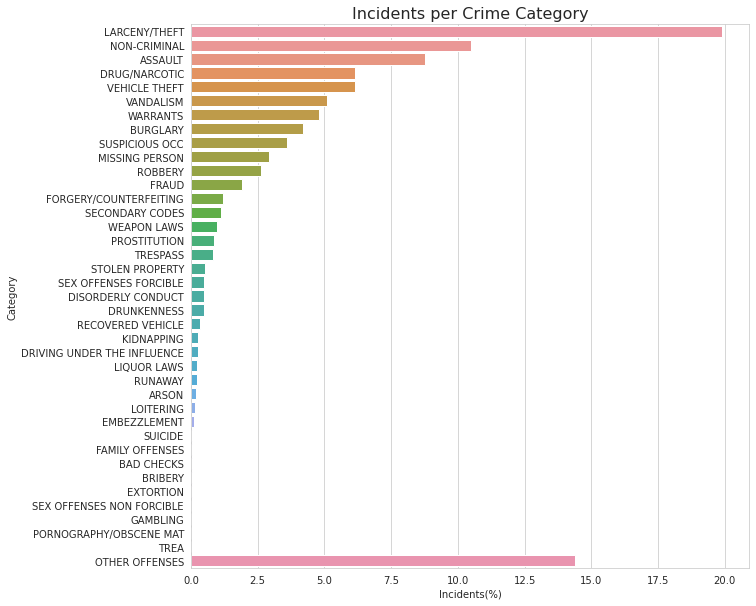

In [27]:
with sns.axes_style("whitegrid") : 
    f, ax = plt.subplots(1, figsize = (10,10))
    sns.barplot(
            category_counts.values / category_counts.values.sum() * 100,
            category_counts.index)

plt.title("Incidents per Crime Category", fontdict = {"fontsize" : 16})
plt.xlabel("Incidents(%)")

In [23]:
category_list = train["Category"].value_counts().index
category_list

Index(['LARCENY/THEFT', 'OTHER OFFENSES', 'NON-CRIMINAL', 'ASSAULT',
       'DRUG/NARCOTIC', 'VEHICLE THEFT', 'VANDALISM', 'WARRANTS', 'BURGLARY',
       'SUSPICIOUS OCC', 'MISSING PERSON', 'ROBBERY', 'FRAUD',
       'FORGERY/COUNTERFEITING', 'SECONDARY CODES', 'WEAPON LAWS',
       'PROSTITUTION', 'TRESPASS', 'STOLEN PROPERTY', 'SEX OFFENSES FORCIBLE',
       'DISORDERLY CONDUCT', 'DRUNKENNESS', 'RECOVERED VEHICLE', 'KIDNAPPING',
       'DRIVING UNDER THE INFLUENCE', 'LIQUOR LAWS', 'RUNAWAY', 'ARSON',
       'LOITERING', 'EMBEZZLEMENT', 'SUICIDE', 'FAMILY OFFENSES', 'BAD CHECKS',
       'BRIBERY', 'EXTORTION', 'SEX OFFENSES NON FORCIBLE', 'GAMBLING',
       'PORNOGRAPHY/OBSCENE MAT', 'TREA'],
      dtype='object')

In [24]:
len(category_list)

39

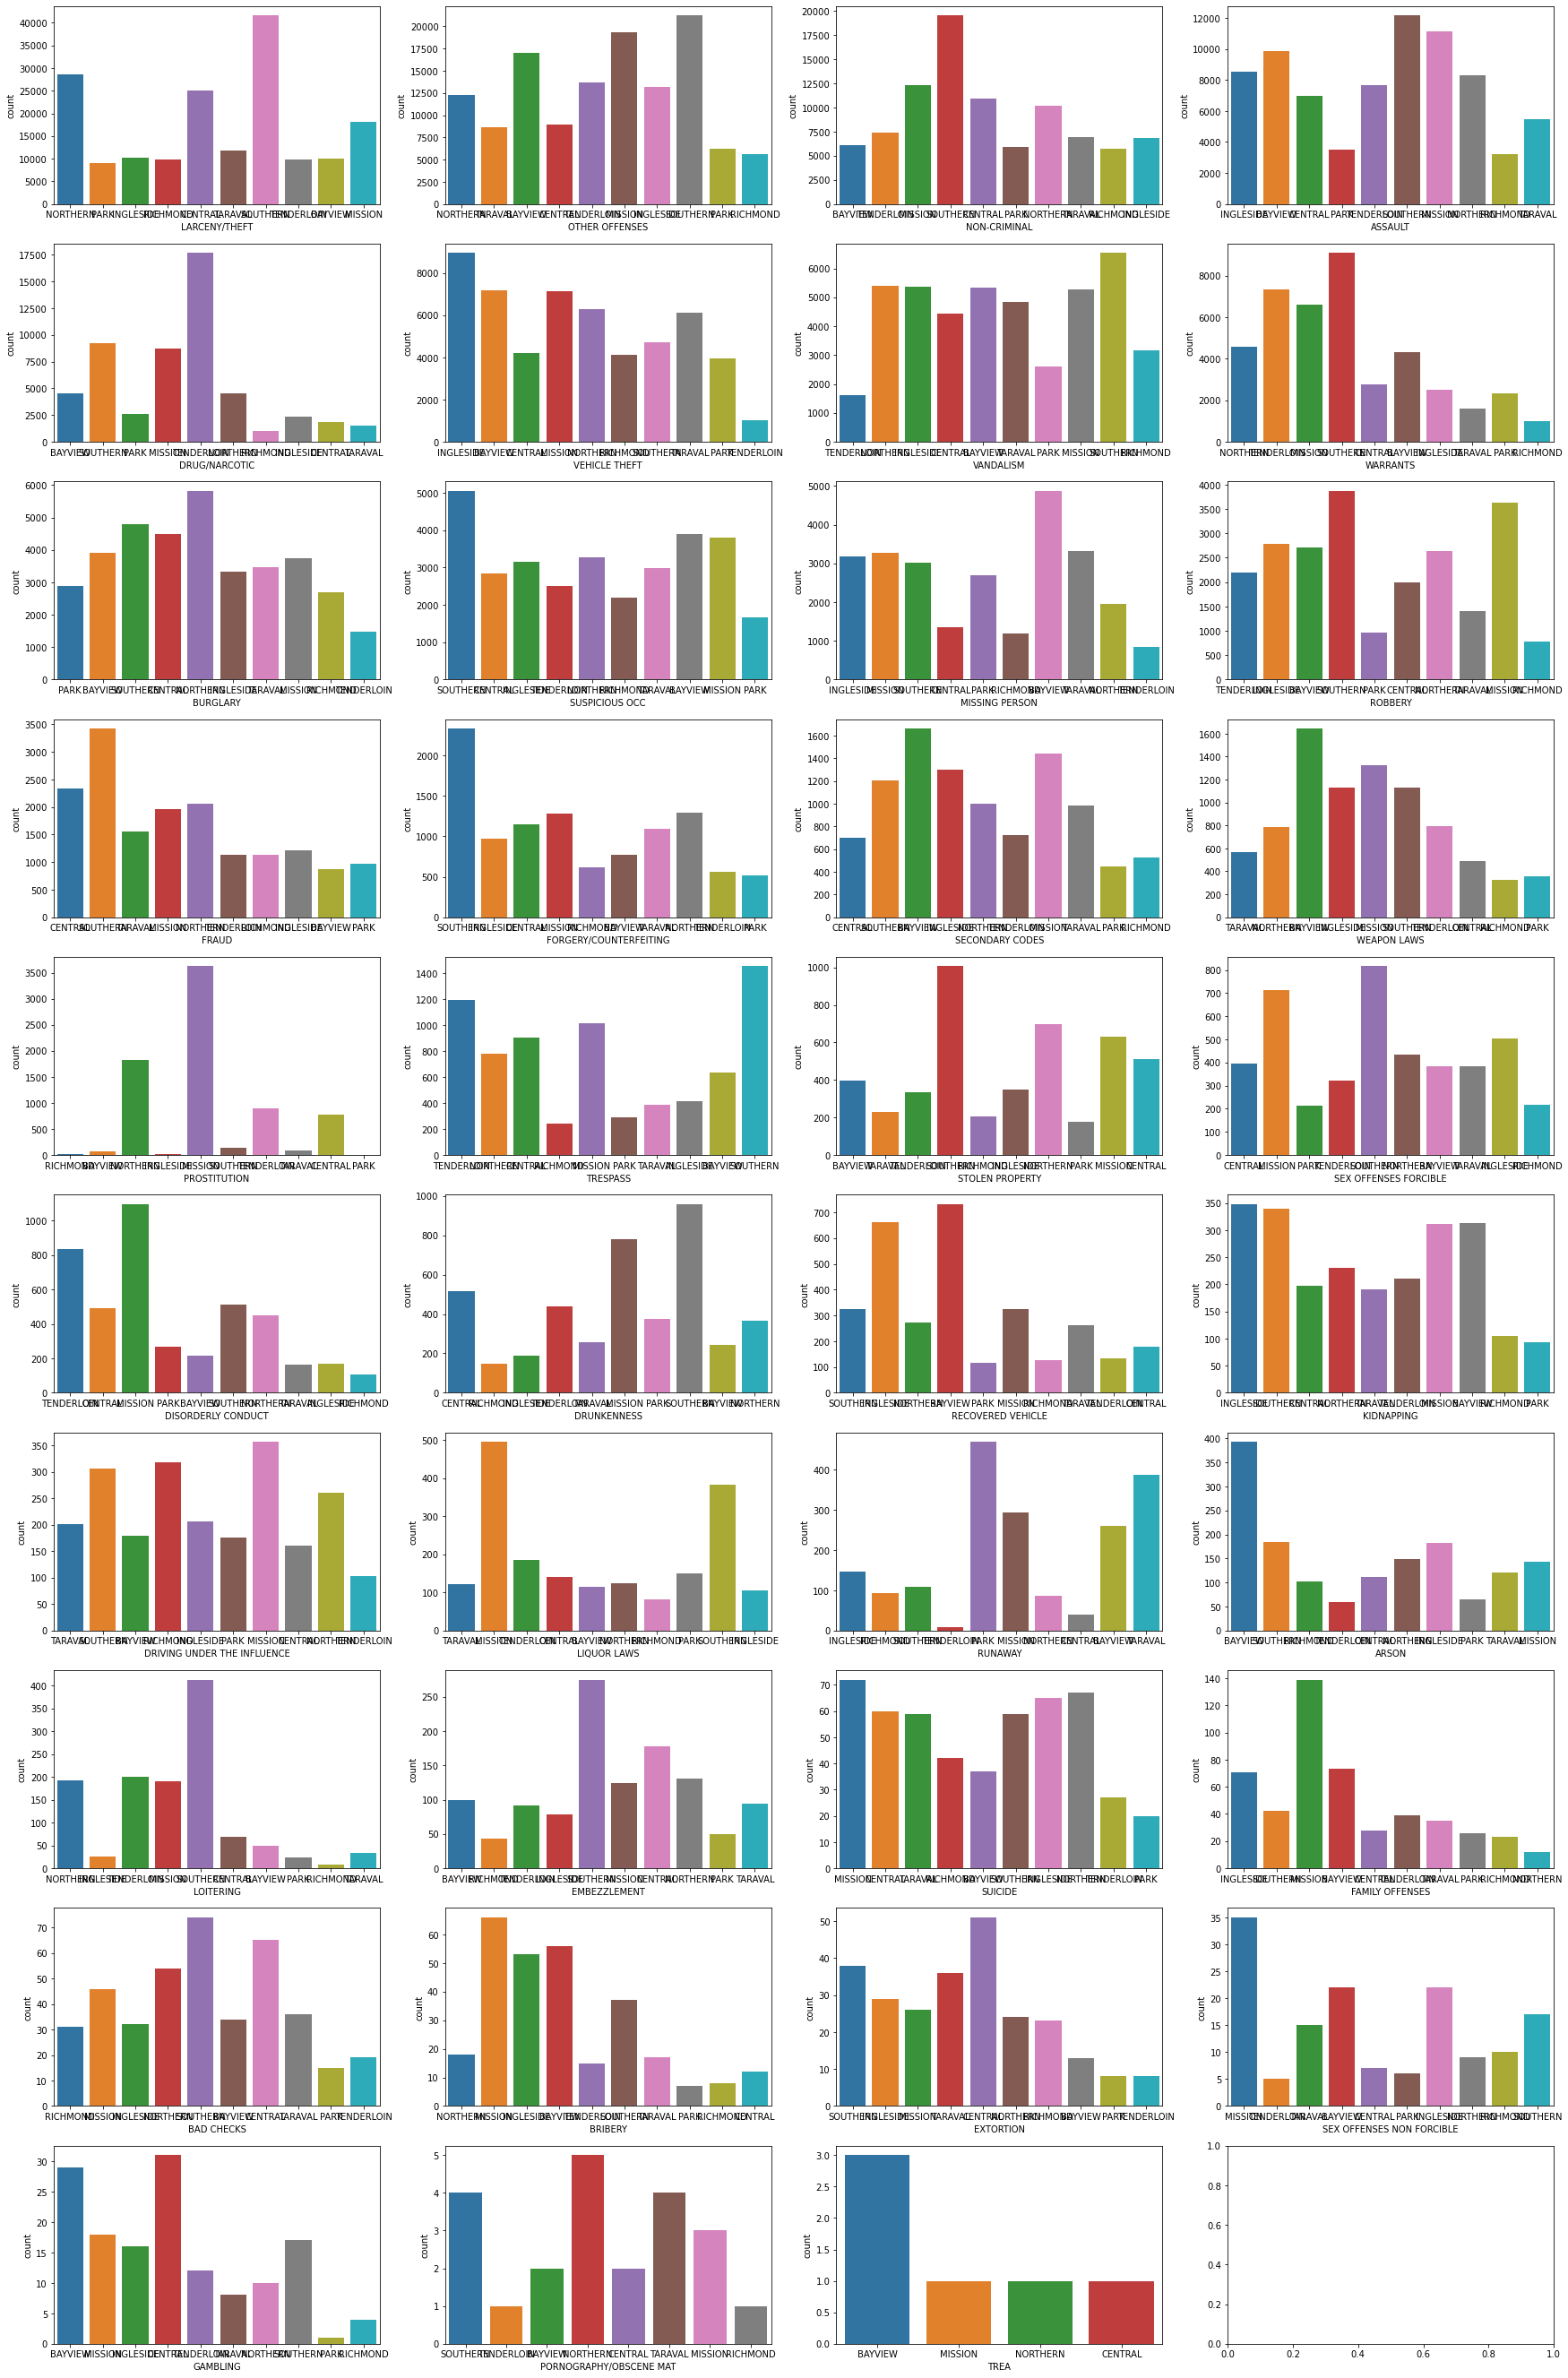

In [25]:
figure, axes = plt.subplots(nrows = 10, ncols = 4)
figure.set_size_inches(30, 48)

for row in range(10) :
    for column in range(4) :
        index = row * 4 + column
        
        if index < len(category_list) :
            ax = axes[row][column]
            category = category_list[index]
            
            target = train[train["Category"] == category]
            sns.countplot(data = target, x = "PdDistrict", ax = ax)
            
            ax.set(xlabel = category)

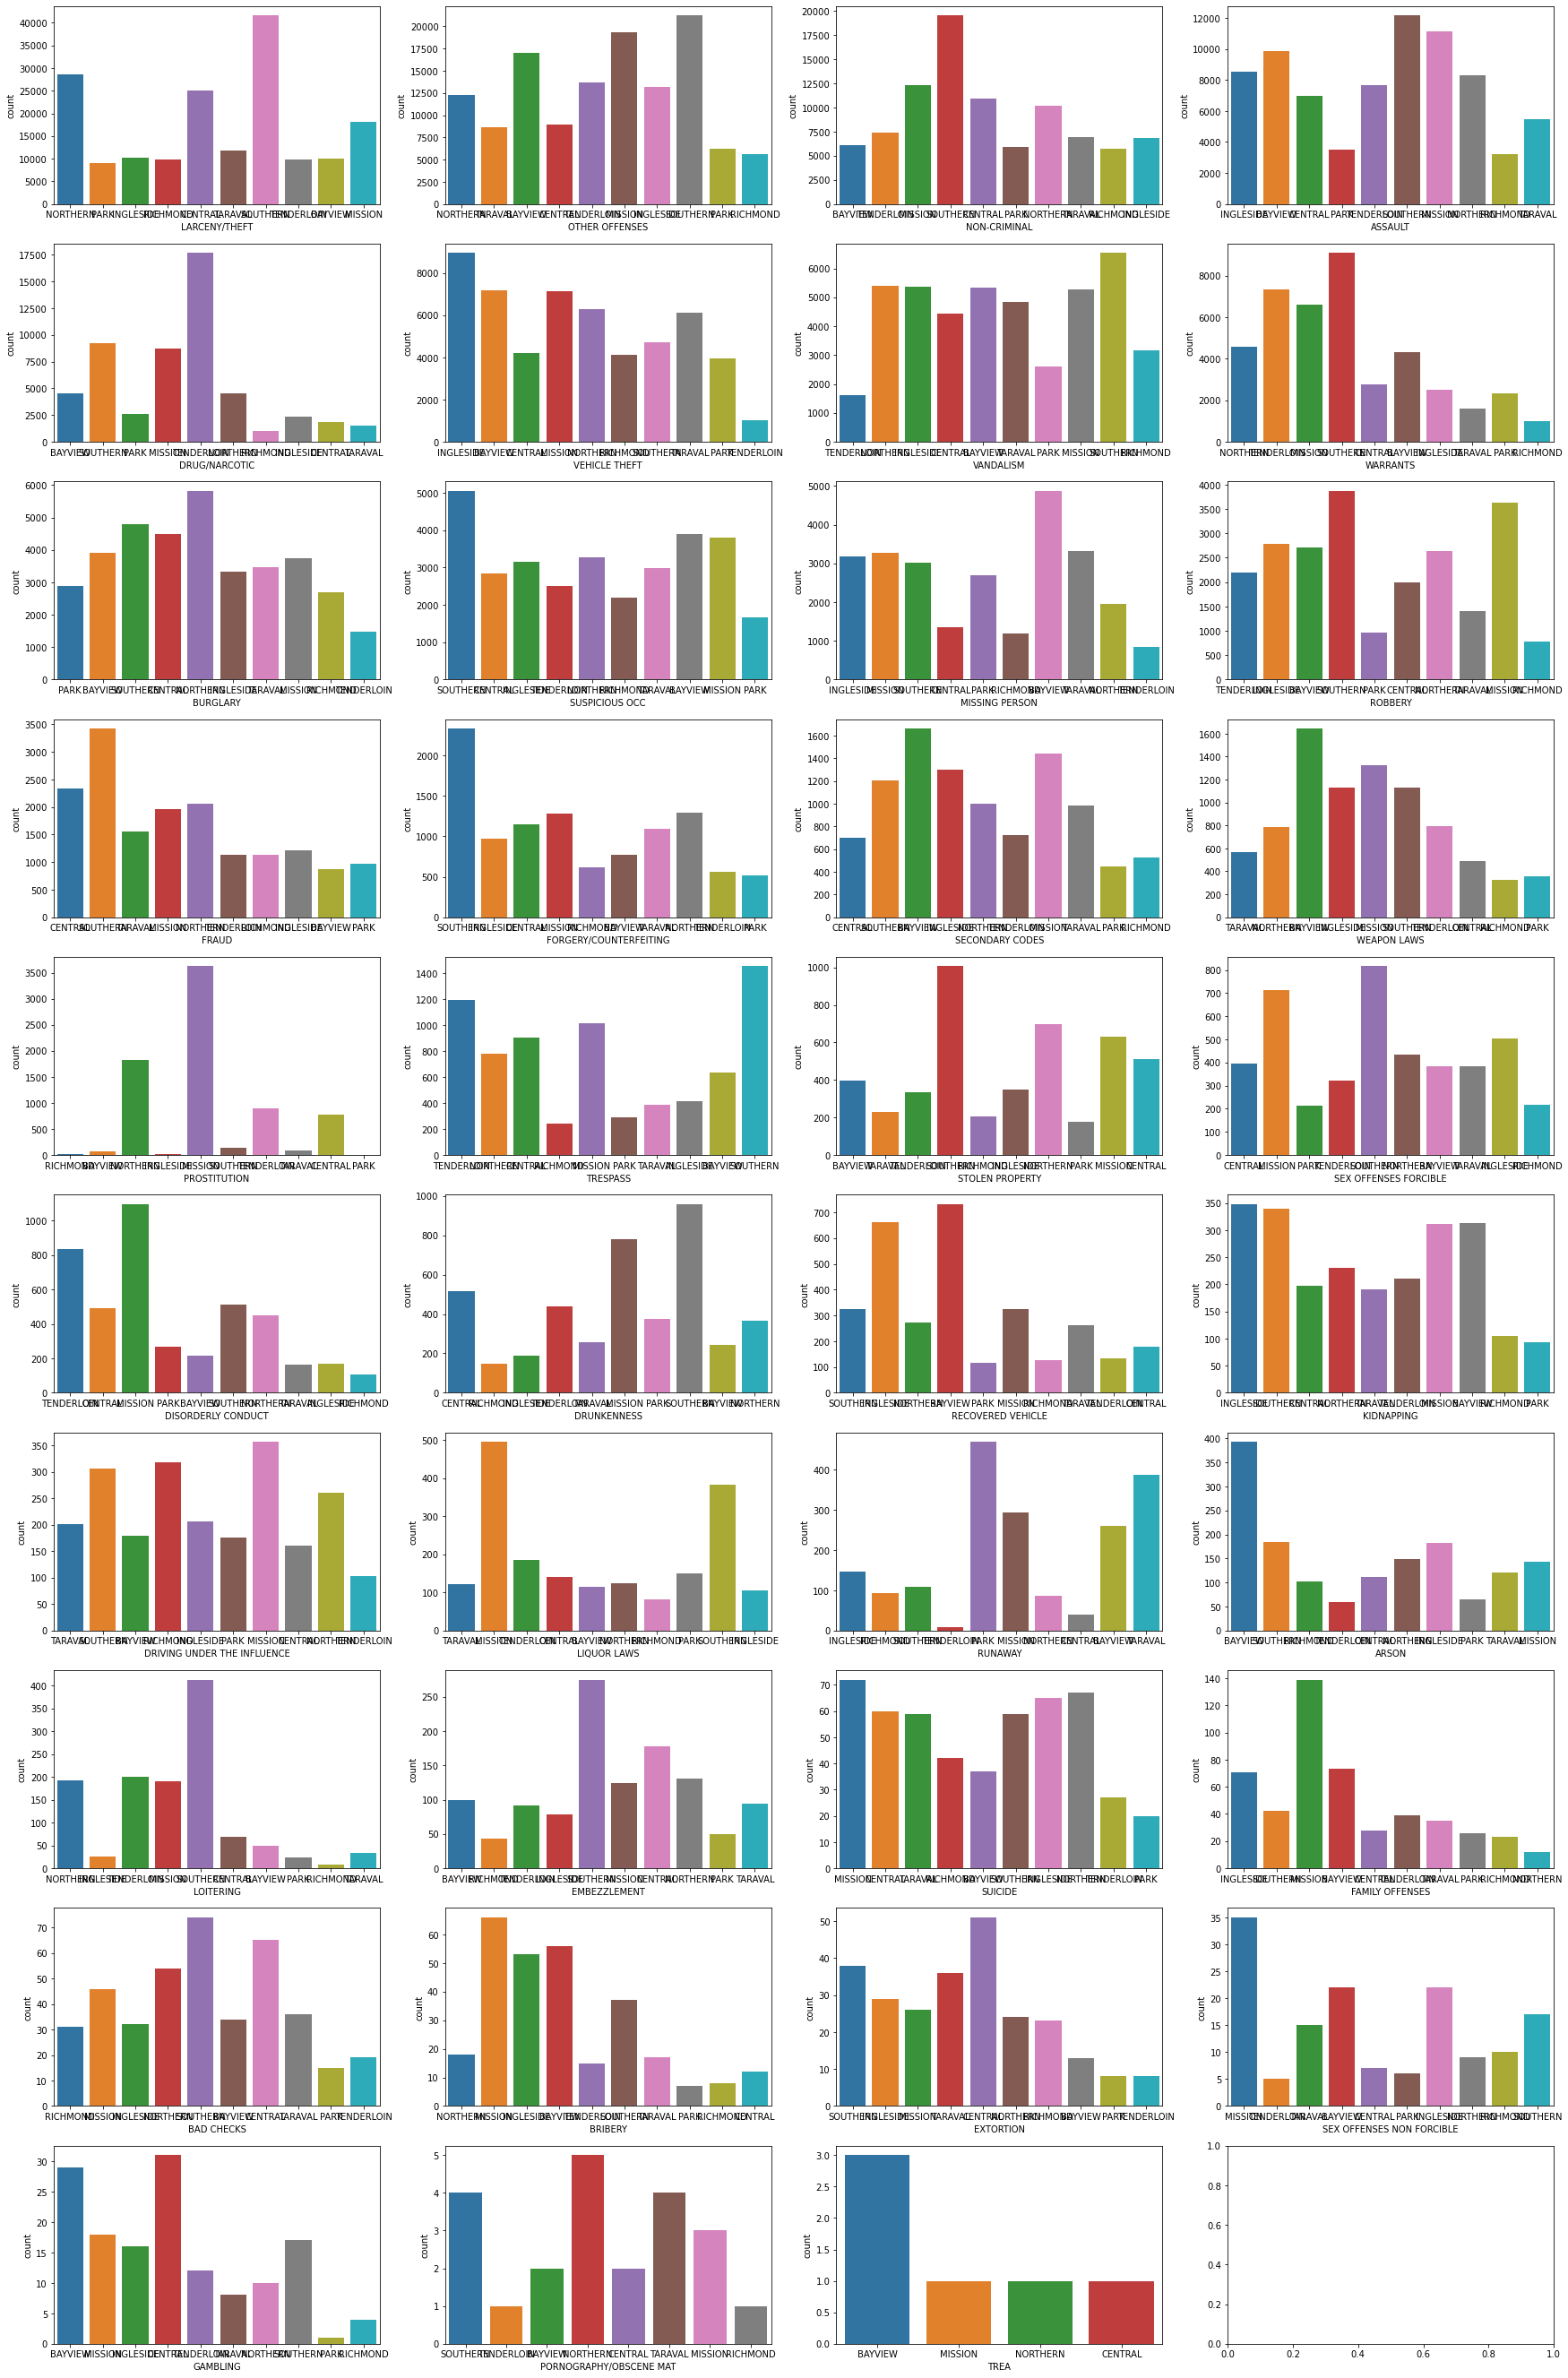

In [26]:
figure, axes = plt.subplots(nrows = 10, ncols = 4)
figure.set_size_inches(30, 48)

category_list = train["Category"].value_counts().index

for row in range(10):
    for column in range(4):
        index = row * 4 + column
        
        if index < len(category_list):
            ax = axes[row][column]
            category = category_list[index]
        
            target = train[train["Category"] == category]
            sns.countplot(data = target, x = "PdDistrict", ax = ax)

            ax.set(xlabel = category)

### 5. PdDistrict

#### - PdDistrict Column 시각화를 통한 분석

In [27]:
train["PdDistrict"].value_counts()

SOUTHERN      156528
MISSION       119723
NORTHERN      105105
BAYVIEW        89098
CENTRAL        85267
TENDERLOIN     81642
INGLESIDE      78722
TARAVAL        65400
PARK           49161
RICHMOND       45080
Name: PdDistrict, dtype: int64

In [28]:
pddistrict_order_list = ['SOUTHERN', 'MISSION', 'NORTHERN', 'BAYVIEW', 'CENTRAL', 'TENDERLOIN',
       'INGLESIDE', 'TARAVAL', 'PARK', 'RICHMOND']

pddistrict_order_list

['SOUTHERN',
 'MISSION',
 'NORTHERN',
 'BAYVIEW',
 'CENTRAL',
 'TENDERLOIN',
 'INGLESIDE',
 'TARAVAL',
 'PARK',
 'RICHMOND']

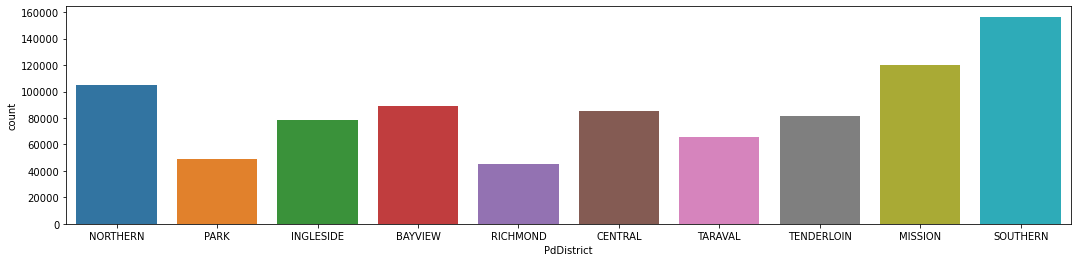

In [29]:
plt.figure(figsize = (18, 4))

sns.countplot(data = train, x = "PdDistrict")

- PdDistrict column은 분석 결과, feature로 사용할 수 있을것으로 보이며, 이후 modeling 작업에 해당 feature로 사용하기 위해 encoding 작업을 진행합니다.
- PdDistrict column을 one-hot encoding 합니다.

In [89]:
# pddistrict_train_onehot = pd.get_dummies(train["PdDistrict"], prefix = "PdDistrict")

# train = pd.concat([train, pddistrict_train_onehot], axis = 1)
# print(train.shape)
# train.head()
# --> get_dummies & concat을 사용하게 되면 실행할때마다, 컬럼이 계속해서 추가되는 문제있음, for문으로 대체

In [88]:
# pddistrict_test_onehot = pd.get_dummies(test['PdDistrict'], prefix = "PdDistrict")

# test = pd.concat([test, pddistrict_test_onehot], axis = 1)

# print(test.shape)
# test.head()

# --> get_dummies & concat을 사용하게 되면 실행할때마다, 컬럼이 계속해서 추가되는 문제있음, for문으로 대체

In [30]:
pddistrict_list = ['SOUTHERN', 
                   'MISSION', 
                   'NORTHERN', 
                   'BAYVIEW', 
                   'CENTRAL', 
                   'TENDERLOIN',
                   'INGLESIDE', 
                   'TARAVAL', 
                   'PARK', 
                   'RICHMOND']

for i in pddistrict_list :
    cols = "PdDistrict-" + i
    train[cols] = train["PdDistrict"] == i
    test[cols] = test["PdDistrict"] == i
    
print(train.shape)
train[['PdDistrict-SOUTHERN', 
       'PdDistrict-MISSION', 
       'PdDistrict-NORTHERN', 
       'PdDistrict-BAYVIEW', 
       'PdDistrict-CENTRAL', 
       'PdDistrict-TENDERLOIN',
       'PdDistrict-INGLESIDE', 
       'PdDistrict-TARAVAL', 
       'PdDistrict-PARK', 
       'PdDistrict-RICHMOND']].head()

(875726, 33)


,PdDistrict-SOUTHERN,PdDistrict-MISSION,PdDistrict-NORTHERN,PdDistrict-BAYVIEW,PdDistrict-CENTRAL,PdDistrict-TENDERLOIN,PdDistrict-INGLESIDE,PdDistrict-TARAVAL,PdDistrict-PARK,PdDistrict-RICHMOND
0,False,False,True,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False


In [31]:
print(test.shape)
test[['PdDistrict-SOUTHERN', 
       'PdDistrict-MISSION', 
       'PdDistrict-NORTHERN', 
       'PdDistrict-BAYVIEW', 
       'PdDistrict-CENTRAL', 
       'PdDistrict-TENDERLOIN',
       'PdDistrict-INGLESIDE', 
       'PdDistrict-TARAVAL', 
       'PdDistrict-PARK', 
       'PdDistrict-RICHMOND']].head()

(884262, 30)


,PdDistrict-SOUTHERN,PdDistrict-MISSION,PdDistrict-NORTHERN,PdDistrict-BAYVIEW,PdDistrict-CENTRAL,PdDistrict-TENDERLOIN,PdDistrict-INGLESIDE,PdDistrict-TARAVAL,PdDistrict-PARK,PdDistrict-RICHMOND
Id,,,,,,,,,,
0,False,False,False,True,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,True,False,False,False


### 6. Address

* 1.Address컬럼에서 '/'가 중간에 포함된 주소는 두개의 street가 만나는 지점으로 교차로를 의미합니다.
* 1-1.일반 길가와 교차로는 장소의 특성으로 범죄 유형에 영향을 미칠 수 있을것으로 보이며, 교차로와 그 외의 장소를 구분하는 feature를 생성합니다.
* 2.동일한 주소가, 표기방식의 차이로 다른 주소로 인식됨, 동일 주소는 병합 처리.
* 3.총 약 20,000개의 주소중, 대다수는 범죄가 몇회 일어나지 않은 주소로, 모델 성능에 큰 영향을 끼칠 수 없음, 그리고 주소 one-hot encoding시 컬럼이 너무 많아져, overfitting이 발생하거나, memory 성능에도 부하가 올 수 있으므로, 현재 code에서는 범죄 카운트 기준 상위 100개 주소만을 남기고 나머지는 'other'로 통합.

#### 6-1. 'CrossRoad' Column 생성

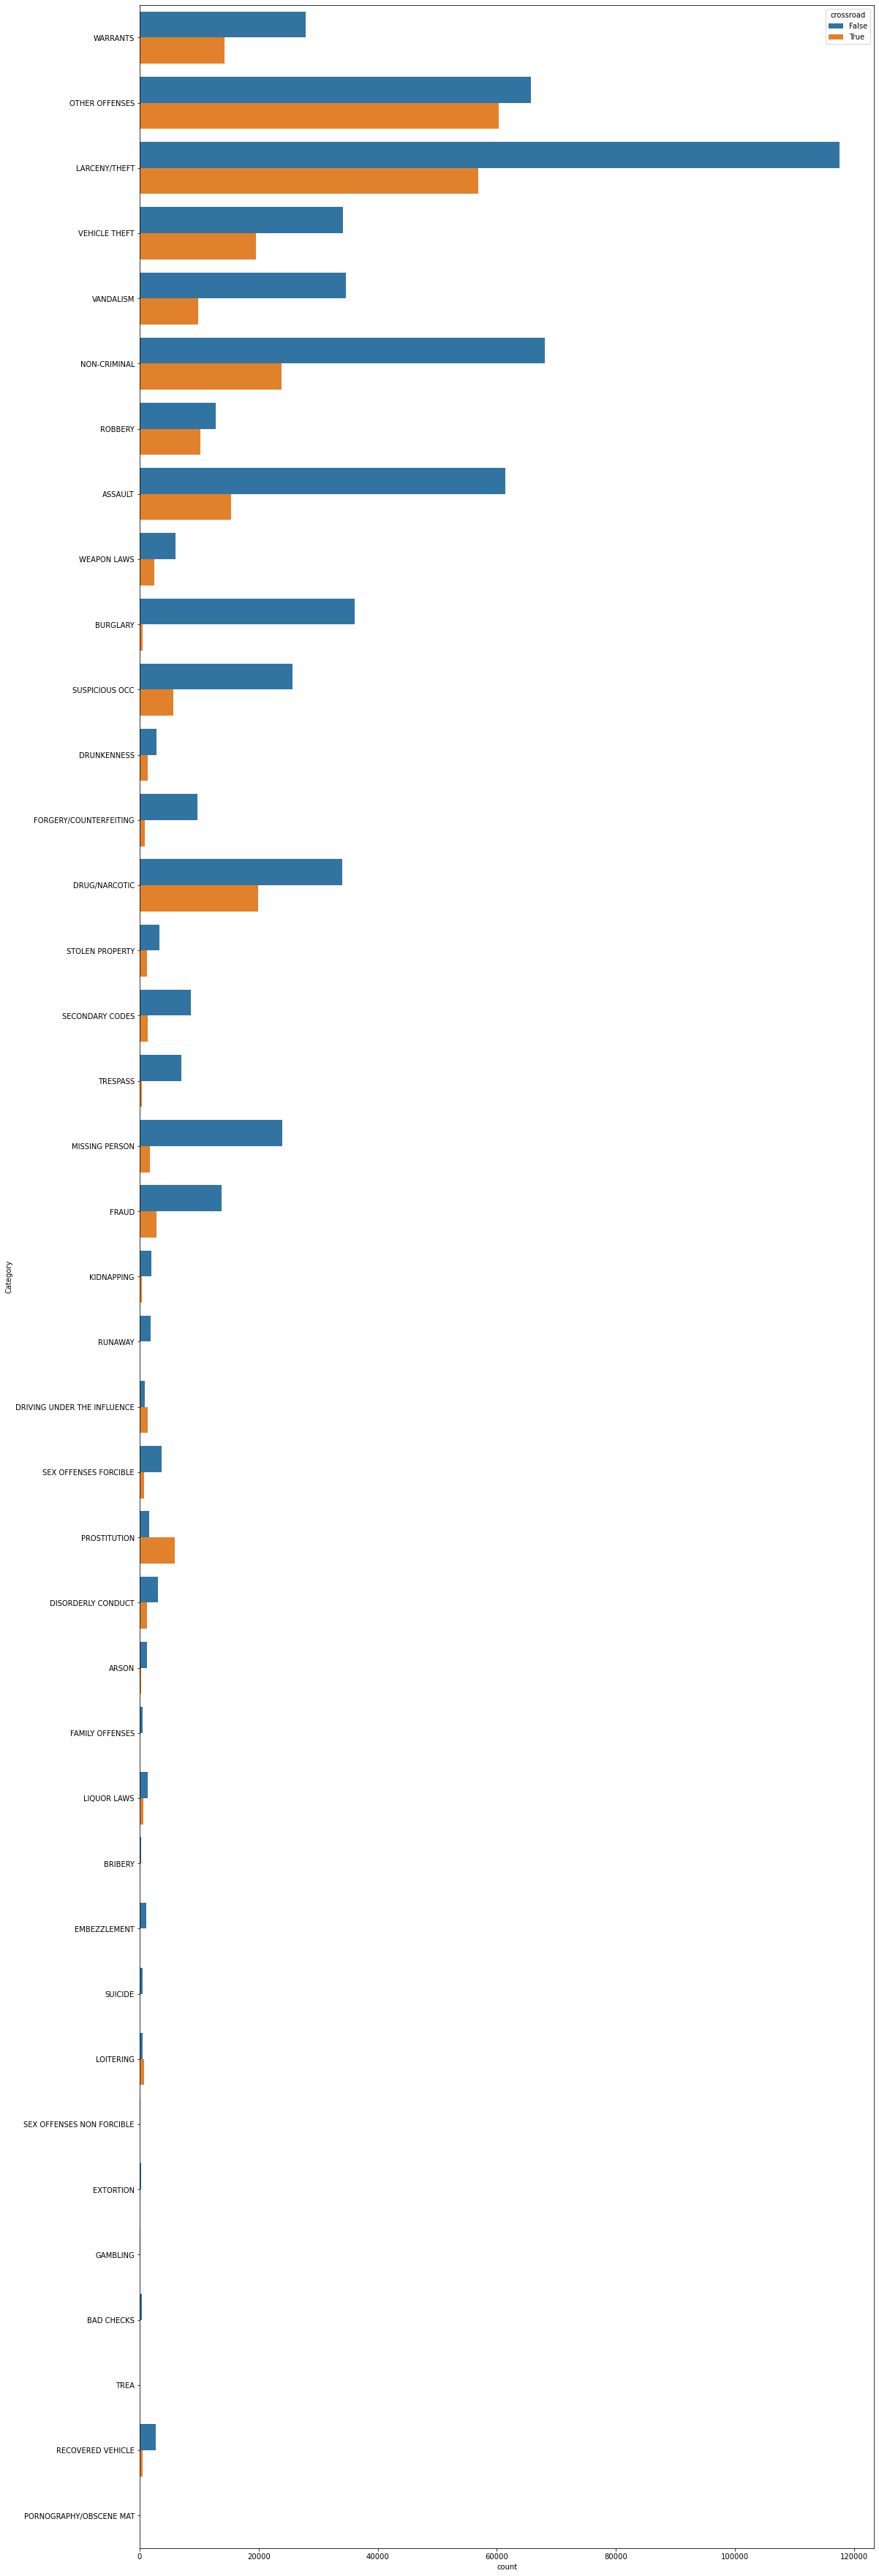

In [32]:
train["crossroad"] = train["Address"].str.contains("/")
test['crossroad'] = test['Address'].str.contains('/')

plt.figure(figsize = (18,64))
sns.countplot(data = train, y = "Category", hue = "crossroad")

In [33]:
train[["Address", "crossroad"]].head()

,Address,crossroad
0,OAK ST / LAGUNA ST,True
1,OAK ST / LAGUNA ST,True
2,VANNESS AV / GREENWICH ST,True
3,1500 Block of LOMBARD ST,False
4,100 Block of BRODERICK ST,False


In [34]:
test[["Address", "crossroad"]].head()

,Address,crossroad
Id,,
0,2000 Block of THOMAS AV,False
1,3RD ST / REVERE AV,True
2,2000 Block of GOUGH ST,False
3,4700 Block of MISSION ST,False
4,4700 Block of MISSION ST,False


#### 6-2. 동일 주소 정리

In [35]:
train["Address"].head()

0           OAK ST / LAGUNA ST
1           OAK ST / LAGUNA ST
2    VANNESS AV / GREENWICH ST
3     1500 Block of LOMBARD ST
4    100 Block of BRODERICK ST
Name: Address, dtype: object

In [36]:
print(train[train["Address"] == "OAK ST / LAGUNA ST"].shape)

(45, 34)


In [37]:
print(train[train["Address"] == "LAGUNA ST / OAK ST"].shape)

(27, 34)


In [38]:
address = "OAK ST / LAGUNA ST"
# address = "LAGUNA ST / OAK ST"


def clean_address(address) : 
    if "/" not in address :
        return address
    
    address1, address2 = address.split("/")
    address1, address2 = address1.strip(), address2.strip()  ##strip 공백제거

    if address1 < address2 :
        address = "{} / {}".format(address1,  address2)
    else :
        address = '{} / {}'.format(address2, address1)
    return address
                            

train["Address(clean)"] = train["Address"].apply(clean_address)
train[["Address", "Address(clean)"]].head()

,Address,Address(clean)
0,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
1,OAK ST / LAGUNA ST,LAGUNA ST / OAK ST
2,VANNESS AV / GREENWICH ST,GREENWICH ST / VANNESS AV
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,100 Block of BRODERICK ST


In [39]:
test["Address(clean)"] = test["Address"].apply(clean_address)
test[["Address", "Address(clean)"]].head(30)

,Address,Address(clean)
Id,,
0,2000 Block of THOMAS AV,2000 Block of THOMAS AV
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,2000 Block of GOUGH ST
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST
5,BROAD ST / CAPITOL AV,BROAD ST / CAPITOL AV
6,100 Block of CHENERY ST,100 Block of CHENERY ST
7,200 Block of BANKS ST,200 Block of BANKS ST
8,2900 Block of 16TH ST,2900 Block of 16TH ST


In [40]:
len(train["Address"].unique()), len(train["Address(clean)"].unique())

(23228, 17812)

In [41]:
len(test['Address'].unique()), len(test['Address(clean)'].unique())

(23184, 17772)

#### 6-3. 범죄 빈도가 현저히 낮은 주소의 정리

In [385]:
# train_address_count = train['Address'].value_counts()
# # train_address_count = train_address_count.iloc[0:100]
# # --> CSR Matrix를 사용하면 되기 때문에, 굳이 메모리 부하를 걱정하여, 100개로 컬럼을 제한하지 않겠다.

# def address_clean(address) :
#     if address in train_address_count :
#         return address
#     else : 
#         return "other"
    
# train["Address(clean)"] = train["Address(clean)"].apply(address_clean)
# test["Address(clean)"] = test["Address(clean)"].apply(address_clean)
# train[["Address", "Address(clean)"]].head(50)

In [386]:
# test_address_count = test['Address'].value_counts()
# test_address_count = test_address_count.iloc[0:100]

# def address_clean(address) :
#     if address in test_address_count :
#         return address
#     else : 
#         return "other"

# test["Address(clean)"] = test["Address(clean)"].apply(address_clean)
# test[["Address", "Address(clean)"]].head(50)

# --> CSR Matrix를 사용하면 되기 때문에, 굳이 메모리 부하를 걱정하여, 100개로 컬럼을 제한하지 않겠다.

In [92]:
top_address_counts = train['Address(clean)'].value_counts()
top_address_counts = top_address_counts[top_address_counts >= 100]
top_address_counts = top_address_counts.index

print(len(top_address_counts))
top_address_counts

1712


Index(['800 Block of BRYANT ST', '800 Block of MARKET ST',
       '2000 Block of MISSION ST', '1000 Block of POTRERO AV',
       '16TH ST / MISSION ST', '900 Block of MARKET ST', '0 Block of TURK ST',
       '0 Block of 6TH ST', '300 Block of ELLIS ST', '400 Block of ELLIS ST',
       ...
       '1100 Block of ELLIS ST', 'BEALE ST / BRYANT ST',
       '400 Block of PARNASSUS AV', '1800 Block of SUTTER ST',
       '2100 Block of FULTON ST', 'LANE ST / PALOU AV',
       '700 Block of WEBSTER ST', '1800 Block of CHESTNUT ST',
       '0 Block of LAGUNA ST', 'OAKDALE AV / RANKIN ST'],
      dtype='object', length=1712)

In [93]:
train.loc[~train["Address(clean)"].isin(top_address_counts), "Address(clean)"] = "Others"
print(train.shape)
train[["Address", "Address(clean)"]].head()

(875726, 35)


,Address,Address(clean)
0,OAK ST / LAGUNA ST,Others
1,OAK ST / LAGUNA ST,Others
2,VANNESS AV / GREENWICH ST,Others
3,1500 Block of LOMBARD ST,1500 Block of LOMBARD ST
4,100 Block of BRODERICK ST,Others


In [94]:
test.loc[~test["Address(clean)"].isin(top_address_counts), "Address(clean)"] = "Others"
print(test.shape)
test[["Address", "Address(clean)"]].head()

(884262, 32)


,Address,Address(clean)
Id,,
0,2000 Block of THOMAS AV,Others
1,3RD ST / REVERE AV,3RD ST / REVERE AV
2,2000 Block of GOUGH ST,Others
3,4700 Block of MISSION ST,4700 Block of MISSION ST
4,4700 Block of MISSION ST,4700 Block of MISSION ST


In [95]:
len(train["Address"].unique()), len(train["Address(clean)"].unique())

(23228, 1713)

In [96]:
len(test['Address'].unique()), len(test['Address(clean)'].unique())

(23184, 1713)

* Address(clean) column의 one-hot encoding 을 진행합니다.

In [97]:
train_address = pd.get_dummies(train["Address(clean)"])
print(train_address.shape)
train_address.head()

(875726, 1713)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
test_address = pd.get_dummies(test["Address(clean)"])
print(test_address.shape)
test_address.head()


(884262, 1713)


,0 Block of 12TH ST,0 Block of 1ST ST,0 Block of 2ND ST,0 Block of 3RD ST,0 Block of 4TH ST,0 Block of 5TH ST,0 Block of 5THSTNORTH ST,0 Block of 6TH ST,0 Block of 7TH ST,0 Block of 8TH ST,...,SANTOS ST / SUNNYDALE AV,STANYAN ST / WALLER ST,STOCKTON ST / SUTTER ST,STOCKTON ST / WASHINGTON ST,SUTTER ST / TAYLOR ST,SUTTER ST / VANNESS AV,TAYLOR ST / TURK ST,THE EMBARCADERONORTH ST / WASHINGTON ST,TURK ST / VANNESS AV,TURK ST / WEBSTER ST
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## CSR matrix
* 메모리를 효율적으로 사용하기 위해 csr matrix사용 
* 참고 : https://en.wikipedia.org/wiki/Sparse_matrix#Compressed_sparse_row_(CSR,_CRS_or_Yale_format)

In [99]:
from scipy.sparse import csr_matrix

train_address = csr_matrix(train_address)
train_address

<875726x1713 sparse matrix of type '<class 'numpy.uint8'>'
	with 875726 stored elements in Compressed Sparse Row format>

In [100]:
test_address = csr_matrix(test_address)
test_address

<884262x1713 sparse matrix of type '<class 'numpy.uint8'>'
	with 884262 stored elements in Compressed Sparse Row format>

## Feature & Label

In [101]:
feature = ['X', 'Y', 'crossroad']
feature = feature + ['Dates-year', 'Dates-month',
       'Dates-day', 'Dates-hour', 'Dates-minute', 'Dates-second']
feature = feature + [ 'Dates-Monday', 'Dates-Thusdaty', 'Dates-Wednsday', 'Dates-Thursday',
       'Dates-Friday', 'Dates-Saturday', 'Dates-Sunday']
feature = feature + ['PdDistrict-SOUTHERN',
       'PdDistrict-MISSION', 'PdDistrict-NORTHERN', 'PdDistrict-BAYVIEW',
       'PdDistrict-CENTRAL', 'PdDistrict-TENDERLOIN', 'PdDistrict-INGLESIDE',
       'PdDistrict-TARAVAL', 'PdDistrict-PARK', 'PdDistrict-RICHMOND']
feature

['X',
 'Y',
 'crossroad',
 'Dates-year',
 'Dates-month',
 'Dates-day',
 'Dates-hour',
 'Dates-minute',
 'Dates-second',
 'Dates-Monday',
 'Dates-Thusdaty',
 'Dates-Wednsday',
 'Dates-Thursday',
 'Dates-Friday',
 'Dates-Saturday',
 'Dates-Sunday',
 'PdDistrict-SOUTHERN',
 'PdDistrict-MISSION',
 'PdDistrict-NORTHERN',
 'PdDistrict-BAYVIEW',
 'PdDistrict-CENTRAL',
 'PdDistrict-TENDERLOIN',
 'PdDistrict-INGLESIDE',
 'PdDistrict-TARAVAL',
 'PdDistrict-PARK',
 'PdDistrict-RICHMOND']

In [102]:
label = "Category"

In [103]:
x_train = train[feature]
print(x_train.shape)
x_train.head()

(875726, 26)


,X,Y,crossroad,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-Monday,...,PdDistrict-SOUTHERN,PdDistrict-MISSION,PdDistrict-NORTHERN,PdDistrict-BAYVIEW,PdDistrict-CENTRAL,PdDistrict-TENDERLOIN,PdDistrict-INGLESIDE,PdDistrict-TARAVAL,PdDistrict-PARK,PdDistrict-RICHMOND
0,-122.425892,37.774599,True,2015,5,13,23,53,0,False,...,False,False,True,False,False,False,False,False,False,False
1,-122.425892,37.774599,True,2015,5,13,23,53,0,False,...,False,False,True,False,False,False,False,False,False,False
2,-122.424363,37.800414,True,2015,5,13,23,33,0,False,...,False,False,True,False,False,False,False,False,False,False
3,-122.426995,37.800873,False,2015,5,13,23,30,0,False,...,False,False,True,False,False,False,False,False,False,False
4,-122.438738,37.771541,False,2015,5,13,23,30,0,False,...,False,False,False,False,False,False,False,False,True,False


In [104]:
x_test = test[feature]
print(x_test.shape)
x_test.head()

(884262, 26)


,X,Y,crossroad,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second,Dates-Monday,...,PdDistrict-SOUTHERN,PdDistrict-MISSION,PdDistrict-NORTHERN,PdDistrict-BAYVIEW,PdDistrict-CENTRAL,PdDistrict-TENDERLOIN,PdDistrict-INGLESIDE,PdDistrict-TARAVAL,PdDistrict-PARK,PdDistrict-RICHMOND
Id,,,,,,,,,,,,,,,,,,,,,
0,-122.399588,37.735051,False,2015.0,5.0,13.0,23.0,53.0,0.0,False,...,False,False,False,True,False,False,False,False,False,False
1,-122.391523,37.732432,True,2015.0,5.0,13.0,23.0,53.0,0.0,False,...,False,False,False,True,False,False,False,False,False,False
2,-122.426002,37.792212,False,2015.0,5.0,13.0,23.0,33.0,0.0,False,...,False,False,True,False,False,False,False,False,False,False
3,-122.437394,37.721412,False,2015.0,5.0,13.0,23.0,30.0,0.0,False,...,False,False,False,False,False,False,True,False,False,False
4,-122.437394,37.721412,False,2015.0,5.0,13.0,23.0,30.0,0.0,False,...,False,False,False,False,False,False,True,False,False,False


In [105]:
from scipy.sparse import hstack


x_train = hstack([x_train.astype('float'), train_address])
x_train

<875726x1739 sparse matrix of type '<class 'numpy.float64'>'
	with 7829365 stored elements in COOrdinate format>

In [84]:
# x_train = train[feature]
# x_train = pd.concat([x_train, train_address], axis = 1)
# print(x_train.shape)
# x_train.head()

# CSR matrix사용함으로서, concat함수는 사용할 수 없고  
# from scipy.sparse import "csr_matrix"를 사용합니다.

In [85]:
# x_test = test[feature]
# x_test = pd.concat([x_test, test_address])
# print(x_test.shape)
# x_test.head()

# CSR matrix사용함으로서, concat함수는 사용할 수 없고  
# from scipy.sparse import "csr_matrix"를 사용합니다.

In [106]:
x_test = hstack([x_test.astype('float'), test_address])
x_test

<884262x1739 sparse matrix of type '<class 'numpy.float64'>'
	with 7916479 stored elements in COOrdinate format>

In [107]:
y_train = train[label]
y_train.head()

0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

## Model

In [116]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimators = 10,
                                        random_state = 27                          
)
model

# n_jobs 는 병렬처리 옵션

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=27, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

## Fitting & Evaluate

In [117]:
# scikit-learn의 model_selection 모듈에서 train_test_split 함수를 가져옴
# train, test data set 쪼개기
from sklearn.model_selection import train_test_split

# 쪼개는 비율은 7:3
# 7의 부분이 X_train_kf와 y_train_kf로 들어가고, 3의 부분이 X_test_kf와 y_test_kf로 들어감.
# 실행할때마다 매번 동일한 결과 나오도록 random_state 옵션을 줘서 seed를 고정
x_train_kf, x_test_kf, y_train_kf, y_test_kf = \
    train_test_split(x_train, y_train, test_size = 0.3, random_state = 27)

# X_train_kf와 y_train_kf 변수에 할당된 데이터의 사이즈를 (row, column) 형식으로 출력
print(x_train_kf.shape, y_train_kf.shape)

# X_test_kf와 y_test_kf 변수에 할당된 데이터의 사이즈를 (row, column) 형식으로 출력
print(x_test_kf.shape, y_test_kf.shape)

(613008, 1739) (613008,)
(262718, 1739) (262718,)


In [118]:
%time model.fit(x_train_kf, y_train_kf)

CPU times: user 58.5 s, sys: 2.2 s, total: 1min
Wall time: 21.6 s


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=10, n_jobs=-1, num_leaves=31, objective=None,
               random_state=27, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [119]:
%time y_predict_test_kf = model.predict_proba(x_test_kf)

print(y_predict_test_kf.shape)
y_predict_test_kf

CPU times: user 15.2 s, sys: 164 ms, total: 15.4 s
Wall time: 4.66 s
(262718, 39)


array([[0.0017956 , 0.07706098, 0.00033618, ..., 0.03906097, 0.06946993,
        0.01055088],
       [0.00135216, 0.06997865, 0.00033603, ..., 0.04571862, 0.06762399,
        0.00846575],
       [0.0014467 , 0.07394263, 0.000343  , ..., 0.04732244, 0.03495211,
        0.0068602 ],
       ...,
       [0.00128965, 0.07368423, 0.00029698, ..., 0.15839708, 0.03127981,
        0.00659009],
       [0.00136584, 0.05944285, 0.00034636, ..., 0.20849512, 0.0303438 ,
        0.00704799],
       [0.00155936, 0.09925508, 0.00035908, ..., 0.05045936, 0.04857144,
        0.01167739]])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


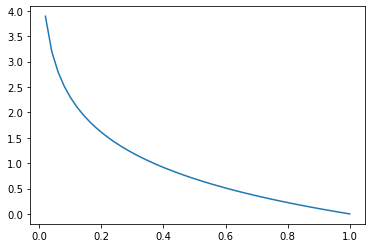

In [151]:
# log_loss 
# EX..
# 확률은 0~1사이기 때문에
x = np.linspace(start = 0.0, stop = 1.0)
y = -1.0 * np.log(x)

plt.plot(x, y)

$$
log loss = -\frac{1}{N}\sum_{i=1}^N\sum_{j=1}^My_{ij}\log(p_{ij})
$$

N -> 전체 데이터의 개수
M -> 전체 범죄의 종류
결국 Y는 정답을 나타내는 값으로 0 or 1, P는 모델에 의한 예측값을 나타내므로 0.2 or 0.3 ... 과 같은 확률을 표시
그래서 공식에 따르면 y값과 log(P)값을 곱할 경우, 정답이 아닌 값(39개범죄중 실제 발생범죄만 1이고 나머지는 0으로 표기)을 곱할 경우 0으로 치환되고 실제 정답을 곱한 값만 
남게됨

여기에 -1.0을 곱하고 '/1'한 값을 sum한것이 log_loss함수

* why? log_loss공식을 사용하는 이유?
 - 예측값이 틀릴수록 정확도가 기하급수적으로 낮게 도출됨.
 - 범죄 예측의 경우 비교적 경범죄가 중범죄보다 범죄빈도는 낮을 수 있으나, 중범죄의 예측실패를 경범죄의 예측실패와 같은 무게로 판단할 수 없기 때문에, 예측이 틀릴경우 패널티를 부여하기 위함.


In [46]:
## ex.
actual = np.array([1, 0, 0])
predict = np.array([0.5, 0.2, 0.3])

np.sum(-1.0 * (actual * np.log(predict)) / 1 )


0.6931471805599453

In [120]:
# scikit-learn의 log_loss 측정공식 함수 가져옴
from sklearn.metrics import log_loss

# log loss를 계산합니다. 정답(y, y_test_kf)과 예측값의 확률(p, y_predict_test_kf)을 데이터로 집어넣으면
# log loss의 계산 결과가 나옵니다. 이를 score라는 변수에 할당합니다.
score = log_loss(y_test_kf, y_predict_test_kf)

# score 변수에 할당한 점수를 출력합니다.(소수점 5째 자리까지만 표시함)
print(f"Score = {score:.5f}") 

Score = 2.53899


## Hyperparameter Tuning

* max_depth : 트리의깊이(가지의 개수)

### Coarse Search
random으로 
가장 좋지 않은 HyperParameter가 나오면 버리는 방법으로 최선의 HyperParameter을 찾아냄.
최종으로 가장 좋은 HyperParameter를 5개 선별함.

In [48]:
# np.random.uniform(low = 0.1, high = 1.0)
# random_uniform = 'low' 부터 'high' 사이의 값을 랜덤하게 출력함.
# np.random.randint(2, 500)
# 마찬가지로, min/max 값을 출력하지만 정수형으로 출력해야할때 사용
10 ** np.random.uniform(low = -10, high = 1)
# 1.0, 0.1, 0.01, 0.001 ...으로 랜덤하게 값을 찾을때 사용 'log space에서 찾는다'

1.6018497294197719e-06

#### Parameters
* learning_rate = GBM자체가 트리를 여러개 섞어쓰는 모델인데, 이때, 학습할 트리의 순서를 해당 옵션을 통해 앞에 있는 트리에 가중치를 두는 옵션(learning_rate = 1.0 일 경우 앞의 트리를 100%로 쓰겠다. 라는 의미)
    --> 예를들어, earning_rate이 낮아, 뒤의 트리에 가중치를 두었는데, n_estimators가 낮다면 뒤의 트리가 몇개 안되기 때문에 성능이 저하됨, 따라서, learning_rate가 낮다면, n_estimators는 높아야(트리가 깊어야)됨
    --> 다른 hyperparameter처럼 '0.1~1.0' 또는 정수형 범주가 아니라, "1.0, 0.1, 0.01, 0.001 ...." 이런식으로 찾아가기 떄문에 다른 옵션과는 다르게 랜덤값을 조회해야함
* num_leaves = 트리에서 뻗어가는 가지의 개수(모델에 최적화된 적당한 수를 찾아야함)
* min_child_samples = 하나의 leave에 몇개의 데이터가 들어갈 것인가
* max_bin = 추가 옵션으로, 숫자로 구성된 컬럼을 fitting할때, 전체 숫자의 value_counts를 학습하면 대상이 너무 많아지는 문제가 발생함. 따라서, 숫자를 특정 구간(구획)으로 나눠서 학습하는것을 설정(ex.10개 설정 --> 총 10개의 구간으로 범주화하여 학습함, 많이 쪼개면 정확도는 높으나, 속도가 느려짐)
* subsample = GBM은 데이터 전체를 가지고 트리를 만드는 것이 아니라, 데이터를 줄여서 트리를 여러개 만드는 형식임(why? 그렇게 하는게 속도가 빠름), 이때, 줄여서 트리를 넣을때 얼마를 넣을것이냐 라는것.
    --> 0.1 ~ 1.0 사이의 값이 들어감
* colsample_bytree = 컬럼이 1700개 라면, 컬럼을 다쓰지 않고 일부만 쓰겠다. 0.1 ~ 1.0사이의 값
* subsample_freq --> 매번 데이터를 샘플링해서 값을 구할것인가 아니면 10번마다 20번마다 할것이냐...(보통 1(매번)해야 좋음)
* class_type = 'balanced', --> 맞췄을때, advantage를 부여하고, 틑렸을때, panalty를 부여하는 방법으로 틀렸을 경우 가중치를 부여함

#### etc
* Early Stopping : 예를들어, n_estimators를 100으로 설정할 경우, random하게 트리를 1~100까지 모두 돌려보고 최적의 hyperParameters를 구하게 되는 데, 이때, 1부터 쭉~성능을 테스트하다가 어느순간 성능이 낮아지기 시작하는 트리개수 부터는 더이상 진행하지않고 멈추는 방식....1~100까지 무조건 다 돌리는게 아니기 때문에 효율적임...가장 효율적으로 n_estimators를 찾는방식

In [ ]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model.selection import train_test_split
from sklearn.maetrics import log_lossf

x_train_kf, y_train_kf, y_test_kf = \
    train_test_split(x_train)

In [157]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


x_train_kf, x_test_kf, y_train_kf, y_test_kf = \
    train_test_split(x_train, y_train, test_size = 0.3, random_state = 27)

n_estimators = 100
num_loop = 100
early_stopping_rounds = 20
## early_stopping을 체크하면서 한번 성능이 떨어진 구간이 발생했다고 바로 멈추는것이 아니고, 여기서 정한 횟수만큼 성능이 저하될때 stop한다는 의미,,,예를들어 "early_stopping = 20"으로 지정할 경우 평가기준(logloss)이 20번 연속으로 저하되었다 라고하면 멈춤

coarse_hyperparameters_list = []

for loop in range(num_loop) : 
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1) # --> learning_rate의 경우 parameter값이 0.1, 0.01, 0.001..,..,..,..이런식으로 나오기 때문에 앞에 10 ** 을 계산에 추가해줌
    num_leaves = np.random.randint(2, 500)
    max_bin = np.random.randint(2, 500)
    min_child_samples = np.random.randint(2, 500)
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    model = LGBMClassifier(n_estimators = n_estimators,
                                           random_state = 37)
    
    model = LGBMClassifier(n_estimators = n_estimators, 
                                             learning_rate = learning_rate, 
                                             num_leaves = num_leaves,
                                             max_bin = max_bin, 
                                             min_child_samples = min_child_samples, 
                                             subsample = subsample,
                                             subsample_freq = 1, 
                                             colsample_bytree = colsample_bytree,
                                             class_type = 'balanced', # -->개수가 적은 범죄유형일 수록 틀렸을 경우 패널티를 부여하는 옵션
                                             random_state = 36)

    
    model.fit(x_train_kf, y_train_kf,
               eval_set = [(x_test_kf, y_test_kf)],
                early_stopping_rounds = early_stopping_rounds)
        ## early_stopping을 사용할때, 기존 "x_train_kf, y_train_kf" 모델 fitting할때, 뒤에다가 eval_set에 holdout validation한 x_test와 y_test를 넣어서 정확도를 측정함, 그리고 early_stopping(카운트)를 추가하여 성능이 높을때의 early_stopping을 반환하도록 함
        
    
    y_predict_test_kf = model.predict_proba(x_test_kf)

    score = log_loss(y_test_kf, y_predict_test_kf)
    
    coarse_hyperparameters_list.append({
            "loop" : loop,
            "n_estimators" : n_estimators,
            "learning_rate" : learning_rate, 
            "num_leaves" : num_leaves, 
            "max_bin" : max_bin,
            "min_child_samples" : min_child_samples, 
            "subsample" : subsample, 
            "subsample_freq" : 1, 
            "colsample_bytree" : colsample_bytree, 
            "class_type" : 'balanced', 
            "random_state" : 36, 
            "score" : score
    })

    print(f"Score = {score:.5f}")


coarse_hyperparameters_list = pd.DataFrame(coarse_hyperparameters_list)
coarse_hyperparameters_list = coarse_hyperparameters_list.sort_values(by = "score")

coarse_hyperparameters_list.head()



# learning_rate = GBM자체가 트리를 여러개 섞어쓰는 모델인데, 이때, 학습할 트리의 순서를 해당 옵션을 통해 앞에 있는 트리에 가중치를 두는 옵션(learning_rate = 1.0 일 경우 앞의 트리를 100%로 쓰겠다. 라는 의미)
    # --> 예를들어, earning_rate이 낮아, 뒤의 트리에 가중치를 두었는데, n_estimators가 낮다면 뒤의 트리가 몇개 안되기 때문에 성능이 저하됨, 따라서, learning_rate가 낮다면, n_estimators는 높아야(트리가 깊어야)됨
    # --> 다른 hyperparameter처럼 '0.1~1.0' 또는 정수형 범주가 아니라, "1.0, 0.1, 0.01, 0.001 ...." 이런식으로 찾아가기 떄문에 다른 옵션과는 다르게 랜덤값을 조회해야함
# num_leaves = 트리에서 뻗어가는 잎의 개수(모델에 최적화된 적당한 수를 찾아야함)
# min_child_samples = 하나의 leave에 몇개의 데이터가 들어갈 것인가
# max_bin = 추가 옵션으로, 숫자로 구성된 컬럼을 fitting할때, 전체 숫자의 value_counts를 학습하면 대상이 너무 많아지는 문제가 발생함. 따라서, 숫자를 특정 구간(구획)으로 나눠서 학습하는것을 설정(ex.10개 설정 --> 총 10개의 구간으로 범주화하여 학습함, 많이 쪼개면 정확도는 높으나, 속도가 느려짐)
# subsample = GBM은 데이터 전체를 가지고 트리를 만드는 것이 아니라, 데이터를 줄여서 트리를 여러개 만드는 형식임(why? 그렇게 하는게 속도가 빠름), 이때, 줄여서 트리를 넣을때 얼마를 넣을것이냐 라는것.
    #    --> 0.1 ~ 1.0 사이의 값이 들어감
# colsample_bytree = 컬럼이 1700개 라면, 컬럼을 다쓰지 않고 일부만 쓰겠다. 0.1 ~ 1.0사이의 값
# subsample_freq --> 매번 데이터를 샘플링해서 값을 구할것인가 아니면 10번마다 20번마다 할것이냐...(보통 1(매번)해야 좋음)
# class_type = 'balanced', --> 맞췄을때, advantage를 부여하고, 틑렸을때, panalty를 부여하는 방법으로 틀렸을 경우 가중치를 부여함



[1]	valid_0's multi_logloss: 2.79352
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 2.68029
[3]	valid_0's multi_logloss: 2.87762
[4]	valid_0's multi_logloss: 2.76501
[5]	valid_0's multi_logloss: 2.87784
[6]	valid_0's multi_logloss: 2.82293
[7]	valid_0's multi_logloss: 2.87887
[8]	valid_0's multi_logloss: 2.87316
[9]	valid_0's multi_logloss: 2.87078
[10]	valid_0's multi_logloss: 2.88264
[11]	valid_0's multi_logloss: 2.91053
[12]	valid_0's multi_logloss: 2.97891
[13]	valid_0's multi_logloss: 3.02358
[14]	valid_0's multi_logloss: 3.23048
[15]	valid_0's multi_logloss: 3.0656
[16]	valid_0's multi_logloss: 3.19657
[17]	valid_0's multi_logloss: 3.14395
[18]	valid_0's multi_logloss: 3.34847
[19]	valid_0's multi_logloss: 3.26788
[20]	valid_0's multi_logloss: 3.69212
[21]	valid_0's multi_logloss: 4.10361
[22]	valid_0's multi_logloss: 4.05761
Early stopping, best iteration is:
[2]	valid_0's multi_logloss: 2.68029
Score = 2.68029
[1]	valid_0's multi_loglo

[89]	valid_0's multi_logloss: 2.6825
[90]	valid_0's multi_logloss: 2.6825
[91]	valid_0's multi_logloss: 2.6825
[92]	valid_0's multi_logloss: 2.6825
[93]	valid_0's multi_logloss: 2.6825
[94]	valid_0's multi_logloss: 2.6825
[95]	valid_0's multi_logloss: 2.6825
[96]	valid_0's multi_logloss: 2.6825
[97]	valid_0's multi_logloss: 2.6825
[98]	valid_0's multi_logloss: 2.6825
[99]	valid_0's multi_logloss: 2.6825
[100]	valid_0's multi_logloss: 2.6825
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.6825
Score = 2.68250
[1]	valid_0's multi_logloss: 2.6825
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 2.6825
[3]	valid_0's multi_logloss: 2.6825
[4]	valid_0's multi_logloss: 2.6825
[5]	valid_0's multi_logloss: 2.6825
[6]	valid_0's multi_logloss: 2.6825
[7]	valid_0's multi_logloss: 2.6825
[8]	valid_0's multi_logloss: 2.6825
[9]	valid_0's multi_logloss: 2.6825
[10]	valid_0's multi_logloss: 2.6825
[11]	valid_0's multi_logloss: 2

Score = 2.68250
[1]	valid_0's multi_logloss: 5.37575
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 5.70345
[3]	valid_0's multi_logloss: 16.4862
[4]	valid_0's multi_logloss: 19.2788
[5]	valid_0's multi_logloss: 28.0865
[6]	valid_0's multi_logloss: 30.3034
[7]	valid_0's multi_logloss: 32.112
[8]	valid_0's multi_logloss: 30.7908
[9]	valid_0's multi_logloss: 30.7908
[10]	valid_0's multi_logloss: 30.7908
[11]	valid_0's multi_logloss: 30.7908
[12]	valid_0's multi_logloss: 30.7908
[13]	valid_0's multi_logloss: 30.7908
[14]	valid_0's multi_logloss: 30.7908
[15]	valid_0's multi_logloss: 30.7908
[16]	valid_0's multi_logloss: 30.7908
[17]	valid_0's multi_logloss: 30.7908
[18]	valid_0's multi_logloss: 30.7908
[19]	valid_0's multi_logloss: 30.7908
[20]	valid_0's multi_logloss: 30.7908
[21]	valid_0's multi_logloss: 30.7908
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 5.37575
Score = 5.37575
[1]	valid_0's multi_logloss: 2.6825
Training un

[88]	valid_0's multi_logloss: 2.68248
[89]	valid_0's multi_logloss: 2.68248
[90]	valid_0's multi_logloss: 2.68248
[91]	valid_0's multi_logloss: 2.68248
[92]	valid_0's multi_logloss: 2.68248
[93]	valid_0's multi_logloss: 2.68248
[94]	valid_0's multi_logloss: 2.68248
[95]	valid_0's multi_logloss: 2.68248
[96]	valid_0's multi_logloss: 2.68248
[97]	valid_0's multi_logloss: 2.68248
[98]	valid_0's multi_logloss: 2.68248
[99]	valid_0's multi_logloss: 2.68248
[100]	valid_0's multi_logloss: 2.68248
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.68248
Score = 2.68248
[1]	valid_0's multi_logloss: 2.6825
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 2.6825
[3]	valid_0's multi_logloss: 2.6825
[4]	valid_0's multi_logloss: 2.6825
[5]	valid_0's multi_logloss: 2.6825
[6]	valid_0's multi_logloss: 2.6825
[7]	valid_0's multi_logloss: 2.6825
[8]	valid_0's multi_logloss: 2.6825
[9]	valid_0's multi_logloss: 2.6825
[10]	valid_0's mu

[99]	valid_0's multi_logloss: 2.53169
[100]	valid_0's multi_logloss: 2.53056
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.53056
Score = 2.53056
[1]	valid_0's multi_logloss: 4.50912
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 3.94129
[3]	valid_0's multi_logloss: 6.41626
[4]	valid_0's multi_logloss: 13.9731
[5]	valid_0's multi_logloss: 18.3178
[6]	valid_0's multi_logloss: 19.8281
[7]	valid_0's multi_logloss: 26.4658
[8]	valid_0's multi_logloss: 29.1802
[9]	valid_0's multi_logloss: 30.9075
[10]	valid_0's multi_logloss: 32.2745
[11]	valid_0's multi_logloss: 32.3464
[12]	valid_0's multi_logloss: 32.3464
[13]	valid_0's multi_logloss: 32.3464
[14]	valid_0's multi_logloss: 32.3464
[15]	valid_0's multi_logloss: 32.3464
[16]	valid_0's multi_logloss: 32.3464
[17]	valid_0's multi_logloss: 32.3464
[18]	valid_0's multi_logloss: 32.3464
[19]	valid_0's multi_logloss: 32.3464
[20]	valid_0's multi_logloss: 32.3464
[21]	val

Score = 2.37175
[1]	valid_0's multi_logloss: 19.5237
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 33.2401
[3]	valid_0's multi_logloss: 30.9648
[4]	valid_0's multi_logloss: 30.9648
[5]	valid_0's multi_logloss: 30.9648
[6]	valid_0's multi_logloss: 30.9648
[7]	valid_0's multi_logloss: 30.9648
[8]	valid_0's multi_logloss: 30.9648
[9]	valid_0's multi_logloss: 30.9648
[10]	valid_0's multi_logloss: 30.9648
[11]	valid_0's multi_logloss: 30.9648
[12]	valid_0's multi_logloss: 30.9648
[13]	valid_0's multi_logloss: 30.9648
[14]	valid_0's multi_logloss: 30.9648
[15]	valid_0's multi_logloss: 30.9648
[16]	valid_0's multi_logloss: 30.9648
[17]	valid_0's multi_logloss: 30.9648
[18]	valid_0's multi_logloss: 30.9648
[19]	valid_0's multi_logloss: 30.9648
[20]	valid_0's multi_logloss: 30.9648
[21]	valid_0's multi_logloss: 30.9648
Early stopping, best iteration is:
[1]	valid_0's multi_logloss: 19.5237
Score = 19.52369
[1]	valid_0's multi_logloss: 7.29585
Training

[62]	valid_0's multi_logloss: 2.33425
[63]	valid_0's multi_logloss: 2.33267
[64]	valid_0's multi_logloss: 2.33084
[65]	valid_0's multi_logloss: 2.32914
[66]	valid_0's multi_logloss: 2.32732
[67]	valid_0's multi_logloss: 2.32592
[68]	valid_0's multi_logloss: 2.32467
[69]	valid_0's multi_logloss: 2.32318
[70]	valid_0's multi_logloss: 2.32177
[71]	valid_0's multi_logloss: 2.32051
[72]	valid_0's multi_logloss: 2.62323
[73]	valid_0's multi_logloss: 2.36503
[74]	valid_0's multi_logloss: 2.47474
[75]	valid_0's multi_logloss: 2.41962
[76]	valid_0's multi_logloss: 2.37105
[77]	valid_0's multi_logloss: 2.32002
[78]	valid_0's multi_logloss: 2.31683
[79]	valid_0's multi_logloss: 2.31559
[80]	valid_0's multi_logloss: 2.31346
[81]	valid_0's multi_logloss: 2.31222
[82]	valid_0's multi_logloss: 2.31051
[83]	valid_0's multi_logloss: 2.30852
[84]	valid_0's multi_logloss: 2.30706
[85]	valid_0's multi_logloss: 2.3058
[86]	valid_0's multi_logloss: 2.30478
[87]	valid_0's multi_logloss: 2.30385
[88]	valid_0'

[73]	valid_0's multi_logloss: 2.68248
[74]	valid_0's multi_logloss: 2.68248
[75]	valid_0's multi_logloss: 2.68248
[76]	valid_0's multi_logloss: 2.68248
[77]	valid_0's multi_logloss: 2.68248
[78]	valid_0's multi_logloss: 2.68248
[79]	valid_0's multi_logloss: 2.68248
[80]	valid_0's multi_logloss: 2.68248
[81]	valid_0's multi_logloss: 2.68248
[82]	valid_0's multi_logloss: 2.68248
[83]	valid_0's multi_logloss: 2.68248
[84]	valid_0's multi_logloss: 2.68248
[85]	valid_0's multi_logloss: 2.68248
[86]	valid_0's multi_logloss: 2.68248
[87]	valid_0's multi_logloss: 2.68248
[88]	valid_0's multi_logloss: 2.68248
[89]	valid_0's multi_logloss: 2.68248
[90]	valid_0's multi_logloss: 2.68248
[91]	valid_0's multi_logloss: 2.68248
[92]	valid_0's multi_logloss: 2.68248
[93]	valid_0's multi_logloss: 2.68248
[94]	valid_0's multi_logloss: 2.68248
[95]	valid_0's multi_logloss: 2.68248
[96]	valid_0's multi_logloss: 2.68248
[97]	valid_0's multi_logloss: 2.68248
[98]	valid_0's multi_logloss: 2.68247
[99]	valid_0

[81]	valid_0's multi_logloss: 2.67737
[82]	valid_0's multi_logloss: 2.67731
[83]	valid_0's multi_logloss: 2.67725
[84]	valid_0's multi_logloss: 2.6772
[85]	valid_0's multi_logloss: 2.67714
[86]	valid_0's multi_logloss: 2.67708
[87]	valid_0's multi_logloss: 2.67702
[88]	valid_0's multi_logloss: 2.67698
[89]	valid_0's multi_logloss: 2.67693
[90]	valid_0's multi_logloss: 2.67687
[91]	valid_0's multi_logloss: 2.67682
[92]	valid_0's multi_logloss: 2.67676
[93]	valid_0's multi_logloss: 2.6767
[94]	valid_0's multi_logloss: 2.67664
[95]	valid_0's multi_logloss: 2.67658
[96]	valid_0's multi_logloss: 2.67653
[97]	valid_0's multi_logloss: 2.67646
[98]	valid_0's multi_logloss: 2.6764
[99]	valid_0's multi_logloss: 2.67633
[100]	valid_0's multi_logloss: 2.67628
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.67628
Score = 2.67628
[1]	valid_0's multi_logloss: 2.6825
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 2.6825
[3]	va

[92]	valid_0's multi_logloss: 2.6825
[93]	valid_0's multi_logloss: 2.6825
[94]	valid_0's multi_logloss: 2.6825
[95]	valid_0's multi_logloss: 2.6825
[96]	valid_0's multi_logloss: 2.6825
[97]	valid_0's multi_logloss: 2.6825
[98]	valid_0's multi_logloss: 2.6825
[99]	valid_0's multi_logloss: 2.6825
[100]	valid_0's multi_logloss: 2.6825
Did not meet early stopping. Best iteration is:
[100]	valid_0's multi_logloss: 2.6825
Score = 2.68250
[1]	valid_0's multi_logloss: 2.68131
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 2.68009
[3]	valid_0's multi_logloss: 2.67889
[4]	valid_0's multi_logloss: 2.67764
[5]	valid_0's multi_logloss: 2.67668
[6]	valid_0's multi_logloss: 2.67517
[7]	valid_0's multi_logloss: 2.67402
[8]	valid_0's multi_logloss: 2.67284
[9]	valid_0's multi_logloss: 2.67182
[10]	valid_0's multi_logloss: 2.67069
[11]	valid_0's multi_logloss: 2.66974
[12]	valid_0's multi_logloss: 2.66858
[13]	valid_0's multi_logloss: 2.66749
[14]	valid_0's mul

Score = 2.68128
[1]	valid_0's multi_logloss: 2.67886
Training until validation scores don't improve for 20 rounds
[2]	valid_0's multi_logloss: 2.6751
[3]	valid_0's multi_logloss: 2.67152
[4]	valid_0's multi_logloss: 2.66831
[5]	valid_0's multi_logloss: 2.66513
[6]	valid_0's multi_logloss: 2.66195
[7]	valid_0's multi_logloss: 2.65877
[8]	valid_0's multi_logloss: 2.65574
[9]	valid_0's multi_logloss: 2.65303
[10]	valid_0's multi_logloss: 2.65004
[11]	valid_0's multi_logloss: 2.64734
[12]	valid_0's multi_logloss: 2.64449
[13]	valid_0's multi_logloss: 2.64177
[14]	valid_0's multi_logloss: 2.63907
[15]	valid_0's multi_logloss: 2.63634
[16]	valid_0's multi_logloss: 2.63366
[17]	valid_0's multi_logloss: 2.63109
[18]	valid_0's multi_logloss: 2.62856
[19]	valid_0's multi_logloss: 2.62613
[20]	valid_0's multi_logloss: 2.62359
[21]	valid_0's multi_logloss: 2.62111
[22]	valid_0's multi_logloss: 2.6187
[23]	valid_0's multi_logloss: 2.61633
[24]	valid_0's multi_logloss: 2.614
[25]	valid_0's multi_log

[8]	valid_0's multi_logloss: 2.6825
[9]	valid_0's multi_logloss: 2.6825
[10]	valid_0's multi_logloss: 2.6825
[11]	valid_0's multi_logloss: 2.6825
[12]	valid_0's multi_logloss: 2.6825
[13]	valid_0's multi_logloss: 2.6825
[14]	valid_0's multi_logloss: 2.6825
[15]	valid_0's multi_logloss: 2.6825
[16]	valid_0's multi_logloss: 2.6825
[17]	valid_0's multi_logloss: 2.6825
[18]	valid_0's multi_logloss: 2.6825
[19]	valid_0's multi_logloss: 2.6825
[20]	valid_0's multi_logloss: 2.6825
[21]	valid_0's multi_logloss: 2.6825
[22]	valid_0's multi_logloss: 2.6825
[23]	valid_0's multi_logloss: 2.6825
[24]	valid_0's multi_logloss: 2.6825
[25]	valid_0's multi_logloss: 2.6825
[26]	valid_0's multi_logloss: 2.6825
[27]	valid_0's multi_logloss: 2.6825
[28]	valid_0's multi_logloss: 2.6825
[29]	valid_0's multi_logloss: 2.6825
[30]	valid_0's multi_logloss: 2.6825
[31]	valid_0's multi_logloss: 2.6825
[32]	valid_0's multi_logloss: 2.6825
[33]	valid_0's multi_logloss: 2.6825
[34]	valid_0's multi_logloss: 2.6825
[35

[22]	valid_0's multi_logloss: 2.6825
[23]	valid_0's multi_logloss: 2.6825
[24]	valid_0's multi_logloss: 2.6825
[25]	valid_0's multi_logloss: 2.6825
[26]	valid_0's multi_logloss: 2.6825
[27]	valid_0's multi_logloss: 2.6825
[28]	valid_0's multi_logloss: 2.6825
[29]	valid_0's multi_logloss: 2.6825
[30]	valid_0's multi_logloss: 2.6825
[31]	valid_0's multi_logloss: 2.6825
[32]	valid_0's multi_logloss: 2.6825
[33]	valid_0's multi_logloss: 2.6825
[34]	valid_0's multi_logloss: 2.6825
[35]	valid_0's multi_logloss: 2.6825
[36]	valid_0's multi_logloss: 2.6825
[37]	valid_0's multi_logloss: 2.6825
[38]	valid_0's multi_logloss: 2.6825
[39]	valid_0's multi_logloss: 2.6825
[40]	valid_0's multi_logloss: 2.6825
[41]	valid_0's multi_logloss: 2.6825
[42]	valid_0's multi_logloss: 2.6825
[43]	valid_0's multi_logloss: 2.6825
[44]	valid_0's multi_logloss: 2.6825
[45]	valid_0's multi_logloss: 2.6825
[46]	valid_0's multi_logloss: 2.6825
[47]	valid_0's multi_logloss: 2.6825
[48]	valid_0's multi_logloss: 2.6825
[

[34]	valid_0's multi_logloss: 2.50468
[35]	valid_0's multi_logloss: 2.50143
[36]	valid_0's multi_logloss: 2.49824
[37]	valid_0's multi_logloss: 2.49511
[38]	valid_0's multi_logloss: 2.49208
[39]	valid_0's multi_logloss: 2.48903
[40]	valid_0's multi_logloss: 2.48605
[41]	valid_0's multi_logloss: 2.48308
[42]	valid_0's multi_logloss: 2.48017
[43]	valid_0's multi_logloss: 2.47735
[44]	valid_0's multi_logloss: 2.47454
[45]	valid_0's multi_logloss: 2.4719
[46]	valid_0's multi_logloss: 2.46917
[47]	valid_0's multi_logloss: 2.46655
[48]	valid_0's multi_logloss: 2.4639
[49]	valid_0's multi_logloss: 2.46138
[50]	valid_0's multi_logloss: 2.45885
[51]	valid_0's multi_logloss: 2.45636
[52]	valid_0's multi_logloss: 2.45389
[53]	valid_0's multi_logloss: 2.45151
[54]	valid_0's multi_logloss: 2.44918
[55]	valid_0's multi_logloss: 2.44684
[56]	valid_0's multi_logloss: 2.44453
[57]	valid_0's multi_logloss: 2.44223
[58]	valid_0's multi_logloss: 2.43999
[59]	valid_0's multi_logloss: 2.43777
[60]	valid_0's

[19]	valid_0's multi_logloss: 2.6825
[20]	valid_0's multi_logloss: 2.6825
[21]	valid_0's multi_logloss: 2.6825
[22]	valid_0's multi_logloss: 2.6825
[23]	valid_0's multi_logloss: 2.6825
[24]	valid_0's multi_logloss: 2.6825
[25]	valid_0's multi_logloss: 2.6825
[26]	valid_0's multi_logloss: 2.6825
[27]	valid_0's multi_logloss: 2.6825
[28]	valid_0's multi_logloss: 2.6825
[29]	valid_0's multi_logloss: 2.6825
[30]	valid_0's multi_logloss: 2.6825
[31]	valid_0's multi_logloss: 2.6825
[32]	valid_0's multi_logloss: 2.6825
[33]	valid_0's multi_logloss: 2.6825
[34]	valid_0's multi_logloss: 2.6825
[35]	valid_0's multi_logloss: 2.6825
[36]	valid_0's multi_logloss: 2.6825
[37]	valid_0's multi_logloss: 2.6825
[38]	valid_0's multi_logloss: 2.6825
[39]	valid_0's multi_logloss: 2.6825
[40]	valid_0's multi_logloss: 2.6825
[41]	valid_0's multi_logloss: 2.6825
[42]	valid_0's multi_logloss: 2.6825
[43]	valid_0's multi_logloss: 2.6825
[44]	valid_0's multi_logloss: 2.6825
[45]	valid_0's multi_logloss: 2.6825
[

[29]	valid_0's multi_logloss: 2.68018
[30]	valid_0's multi_logloss: 2.68012
[31]	valid_0's multi_logloss: 2.68004
[32]	valid_0's multi_logloss: 2.67996
[33]	valid_0's multi_logloss: 2.67989
[34]	valid_0's multi_logloss: 2.67982
[35]	valid_0's multi_logloss: 2.67973
[36]	valid_0's multi_logloss: 2.67966
[37]	valid_0's multi_logloss: 2.67958
[38]	valid_0's multi_logloss: 2.6795
[39]	valid_0's multi_logloss: 2.6794
[40]	valid_0's multi_logloss: 2.67931
[41]	valid_0's multi_logloss: 2.67924
[42]	valid_0's multi_logloss: 2.67916
[43]	valid_0's multi_logloss: 2.67907
[44]	valid_0's multi_logloss: 2.679
[45]	valid_0's multi_logloss: 2.67894
[46]	valid_0's multi_logloss: 2.67884
[47]	valid_0's multi_logloss: 2.67876
[48]	valid_0's multi_logloss: 2.67868
[49]	valid_0's multi_logloss: 2.67861
[50]	valid_0's multi_logloss: 2.67851
[51]	valid_0's multi_logloss: 2.67844
[52]	valid_0's multi_logloss: 2.67837
[53]	valid_0's multi_logloss: 2.6783
[54]	valid_0's multi_logloss: 2.67823
[55]	valid_0's mu

[38]	valid_0's multi_logloss: 2.6825
[39]	valid_0's multi_logloss: 2.6825
[40]	valid_0's multi_logloss: 2.6825
[41]	valid_0's multi_logloss: 2.6825
[42]	valid_0's multi_logloss: 2.6825
[43]	valid_0's multi_logloss: 2.6825
[44]	valid_0's multi_logloss: 2.6825
[45]	valid_0's multi_logloss: 2.6825
[46]	valid_0's multi_logloss: 2.6825
[47]	valid_0's multi_logloss: 2.6825
[48]	valid_0's multi_logloss: 2.6825
[49]	valid_0's multi_logloss: 2.6825
[50]	valid_0's multi_logloss: 2.6825
[51]	valid_0's multi_logloss: 2.6825
[52]	valid_0's multi_logloss: 2.6825
[53]	valid_0's multi_logloss: 2.6825
[54]	valid_0's multi_logloss: 2.6825
[55]	valid_0's multi_logloss: 2.6825
[56]	valid_0's multi_logloss: 2.6825
[57]	valid_0's multi_logloss: 2.6825
[58]	valid_0's multi_logloss: 2.6825
[59]	valid_0's multi_logloss: 2.6825
[60]	valid_0's multi_logloss: 2.6825
[61]	valid_0's multi_logloss: 2.6825
[62]	valid_0's multi_logloss: 2.6825
[63]	valid_0's multi_logloss: 2.6825
[64]	valid_0's multi_logloss: 2.6825
[

[26]	valid_0's multi_logloss: 2.68249
[27]	valid_0's multi_logloss: 2.68249
[28]	valid_0's multi_logloss: 2.68249
[29]	valid_0's multi_logloss: 2.68249
[30]	valid_0's multi_logloss: 2.68249
[31]	valid_0's multi_logloss: 2.68249
[32]	valid_0's multi_logloss: 2.68249
[33]	valid_0's multi_logloss: 2.68249
[34]	valid_0's multi_logloss: 2.68249
[35]	valid_0's multi_logloss: 2.68248
[36]	valid_0's multi_logloss: 2.68248
[37]	valid_0's multi_logloss: 2.68248
[38]	valid_0's multi_logloss: 2.68248
[39]	valid_0's multi_logloss: 2.68248
[40]	valid_0's multi_logloss: 2.68248
[41]	valid_0's multi_logloss: 2.68248
[42]	valid_0's multi_logloss: 2.68248
[43]	valid_0's multi_logloss: 2.68248
[44]	valid_0's multi_logloss: 2.68248
[45]	valid_0's multi_logloss: 2.68248
[46]	valid_0's multi_logloss: 2.68248
[47]	valid_0's multi_logloss: 2.68248
[48]	valid_0's multi_logloss: 2.68248
[49]	valid_0's multi_logloss: 2.68248
[50]	valid_0's multi_logloss: 2.68248
[51]	valid_0's multi_logloss: 2.68248
[52]	valid_0

[35]	valid_0's multi_logloss: 2.6825
[36]	valid_0's multi_logloss: 2.6825
[37]	valid_0's multi_logloss: 2.6825
[38]	valid_0's multi_logloss: 2.6825
[39]	valid_0's multi_logloss: 2.6825
[40]	valid_0's multi_logloss: 2.6825
[41]	valid_0's multi_logloss: 2.6825
[42]	valid_0's multi_logloss: 2.6825
[43]	valid_0's multi_logloss: 2.6825
[44]	valid_0's multi_logloss: 2.6825
[45]	valid_0's multi_logloss: 2.6825
[46]	valid_0's multi_logloss: 2.6825
[47]	valid_0's multi_logloss: 2.6825
[48]	valid_0's multi_logloss: 2.6825
[49]	valid_0's multi_logloss: 2.6825
[50]	valid_0's multi_logloss: 2.6825
[51]	valid_0's multi_logloss: 2.6825
[52]	valid_0's multi_logloss: 2.6825
[53]	valid_0's multi_logloss: 2.6825
[54]	valid_0's multi_logloss: 2.6825
[55]	valid_0's multi_logloss: 2.6825
[56]	valid_0's multi_logloss: 2.6825
[57]	valid_0's multi_logloss: 2.6825
[58]	valid_0's multi_logloss: 2.6825
[59]	valid_0's multi_logloss: 2.6825
[60]	valid_0's multi_logloss: 2.6825
[61]	valid_0's multi_logloss: 2.6825
[

[22]	valid_0's multi_logloss: 2.6825
[23]	valid_0's multi_logloss: 2.6825
[24]	valid_0's multi_logloss: 2.6825
[25]	valid_0's multi_logloss: 2.6825
[26]	valid_0's multi_logloss: 2.6825
[27]	valid_0's multi_logloss: 2.6825
[28]	valid_0's multi_logloss: 2.6825
[29]	valid_0's multi_logloss: 2.6825
[30]	valid_0's multi_logloss: 2.6825
[31]	valid_0's multi_logloss: 2.6825
[32]	valid_0's multi_logloss: 2.6825
[33]	valid_0's multi_logloss: 2.6825
[34]	valid_0's multi_logloss: 2.6825
[35]	valid_0's multi_logloss: 2.6825
[36]	valid_0's multi_logloss: 2.6825
[37]	valid_0's multi_logloss: 2.6825
[38]	valid_0's multi_logloss: 2.6825
[39]	valid_0's multi_logloss: 2.6825
[40]	valid_0's multi_logloss: 2.6825
[41]	valid_0's multi_logloss: 2.6825
[42]	valid_0's multi_logloss: 2.6825
[43]	valid_0's multi_logloss: 2.6825
[44]	valid_0's multi_logloss: 2.6825
[45]	valid_0's multi_logloss: 2.6825
[46]	valid_0's multi_logloss: 2.6825
[47]	valid_0's multi_logloss: 2.6825
[48]	valid_0's multi_logloss: 2.6825
[

[32]	valid_0's multi_logloss: 2.64406
[33]	valid_0's multi_logloss: 2.64323
[34]	valid_0's multi_logloss: 2.64226
[35]	valid_0's multi_logloss: 2.64125
[36]	valid_0's multi_logloss: 2.64035
[37]	valid_0's multi_logloss: 2.63939
[38]	valid_0's multi_logloss: 2.63852
[39]	valid_0's multi_logloss: 2.63757
[40]	valid_0's multi_logloss: 2.63638
[41]	valid_0's multi_logloss: 2.63529
[42]	valid_0's multi_logloss: 2.63443
[43]	valid_0's multi_logloss: 2.63342
[44]	valid_0's multi_logloss: 2.6324
[45]	valid_0's multi_logloss: 2.63126
[46]	valid_0's multi_logloss: 2.63021
[47]	valid_0's multi_logloss: 2.62919
[48]	valid_0's multi_logloss: 2.62814
[49]	valid_0's multi_logloss: 2.62695
[50]	valid_0's multi_logloss: 2.62581
[51]	valid_0's multi_logloss: 2.62501
[52]	valid_0's multi_logloss: 2.62423
[53]	valid_0's multi_logloss: 2.62305
[54]	valid_0's multi_logloss: 2.62248
[55]	valid_0's multi_logloss: 2.62165
[56]	valid_0's multi_logloss: 2.6208
[57]	valid_0's multi_logloss: 2.61994
[58]	valid_0's

[18]	valid_0's multi_logloss: 2.6825
[19]	valid_0's multi_logloss: 2.6825
[20]	valid_0's multi_logloss: 2.6825
[21]	valid_0's multi_logloss: 2.6825
[22]	valid_0's multi_logloss: 2.6825
[23]	valid_0's multi_logloss: 2.6825
[24]	valid_0's multi_logloss: 2.6825
[25]	valid_0's multi_logloss: 2.6825
[26]	valid_0's multi_logloss: 2.6825
[27]	valid_0's multi_logloss: 2.6825
[28]	valid_0's multi_logloss: 2.6825
[29]	valid_0's multi_logloss: 2.6825
[30]	valid_0's multi_logloss: 2.6825
[31]	valid_0's multi_logloss: 2.6825
[32]	valid_0's multi_logloss: 2.6825
[33]	valid_0's multi_logloss: 2.6825
[34]	valid_0's multi_logloss: 2.6825
[35]	valid_0's multi_logloss: 2.6825
[36]	valid_0's multi_logloss: 2.6825
[37]	valid_0's multi_logloss: 2.6825
[38]	valid_0's multi_logloss: 2.6825
[39]	valid_0's multi_logloss: 2.6825
[40]	valid_0's multi_logloss: 2.6825
[41]	valid_0's multi_logloss: 2.6825
[42]	valid_0's multi_logloss: 2.6825
[43]	valid_0's multi_logloss: 2.6825
[44]	valid_0's multi_logloss: 2.6825
[

KeyboardInterrupt: 

### Finer Search

In [152]:
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss


x_train_kf, x_test_kf, y_train_kf, y_test_kf = \
    train_test_split(x_train, y_train, test_size = 0.3, random_state = 27)

n_estimators = 10
num_loop = 5
## early_stopping을 체크하면서 한번 성능이 떨어진 구간이 발생했다고 바로 멈추는것이 아니고, 여기서 정한 횟수만큼 성능이 저하될때 stop한다는 의미,,,예를들어 "early_stopping = 20"으로 지정할 경우 평가기준(logloss)이 20번 연속으로 저하되었다 라고하면 멈춤

finer_hyperparameters_list = []

for loop in range(num_loop) : 
    learning_rate = 10 ** np.random.uniform(low = -10, high = 1)
    num_leaves = np.random.randint(40, 400)
    max_bin = np.random.randint(5, 450)
    min_child_samples = np.random.randint(100, 480)
    subsample = np.random.uniform(low = 0.1, high = 1.0)
    colsample_bytree = np.random.uniform(low = 0.1, high = 1.0)
    model = LGBMClassifier(n_estimators = n_estimators,
                                           random_state = 27)
    
    model = LGBMClassifier(n_estimators = n_estimators, 
                                             learning_rate = learning_rate, 
                                             num_leaves = num_leaves,
                                             max_bin = max_bin, 
                                             min_child_samples = min_child_samples, 
                                             subsample = subsample,
                                             subsample_freq = 1, 
                                             colsample_bytree = colsample_bytree,
                                             class_type = 'balanced',
                                             random_state = 27)

    
    model.fit(x_train_kf, y_train_kf)
        ## early_stopping을 사용할때, 기존 "x_train_kf, y_train_kf" 모델 fitting할때, 뒤에다가 eval_set에 holdout validation한 x_test와 y_test를 넣어서 정확도를 측정함, 그리고 early_stopping(카운트)를 추가하여 성능이 높을때의 early_stopping을 반환하도록 함
        
    
    y_predict_test_kf = model.predict_proba(x_test_kf)

    score = log_loss(y_test_kf, y_predict_test_kf)
    
    finer_hyperparameters_list.append({
            "loop" : loop,
            "n_estimators" : n_estimators,
            "learning_rate" : learning_rate, 
            "num_leaves" : num_leaves, 
            "max_bin" : max_bin,
            "min_child_samples" : min_child_samples, 
            "subsample" : subsample, 
            "subsample_freq" : 1, 
            "colsample_bytree" : colsample_bytree, 
            "class_type" : 'balanced', 
            "random_state" : 27, 
            "score" : score
        
    })

    print(f"Score = {score:.5f}")


finer_hyperparameters_list = pd.DataFrame(finer_hyperparameters_list)
finer_hyperparameters_list = finer_hyperparameters_list.sort_values(by = "score")

finer_hyperparameters_list.head()

Score = 2.68250
Score = 2.68156
Score = 2.53001
Score = 2.68250
Score = 3.28263


,loop,n_estimators,learning_rate,num_leaves,max_bin,min_child_samples,subsample,subsample_freq,colsample_bytree,class_type,random_state,score
2,2,10,1.064001e-01,398,33,108,0.799669,1,0.245805,balanced,27,2.530006
1,1,10,2.247590e-04,47,441,415,0.406679,1,0.598043,balanced,27,2.681557
3,3,10,2.027937e-08,102,202,241,0.318283,1,0.845678,balanced,27,2.682504
0,0,10,3.226302e-09,344,111,228,0.866506,1,0.787114,balanced,27,2.682504
4,4,10,5.128978e-01,388,283,419,0.274327,1,0.409843,balanced,27,3.282628
